## Investigation On Intervals and Determine whether it's meal

In [1]:
import sys
sys.path.insert(0, '../scripts')

import os
import numpy as np
import intervals as invs
import warnings
from path import fr1_female_path, fr1_female_sheets

export_root = '../export/Figure 1/WT_FR1_Meal'
os.makedirs(export_root, exist_ok=True)
warnings.filterwarnings('ignore')
alpha = 0.1
import meals as ml
import tools as tl
import intervals as invs
from accuracy import graph_single_stats
from preprocessing import read_excel_by_sheet

## Female Group

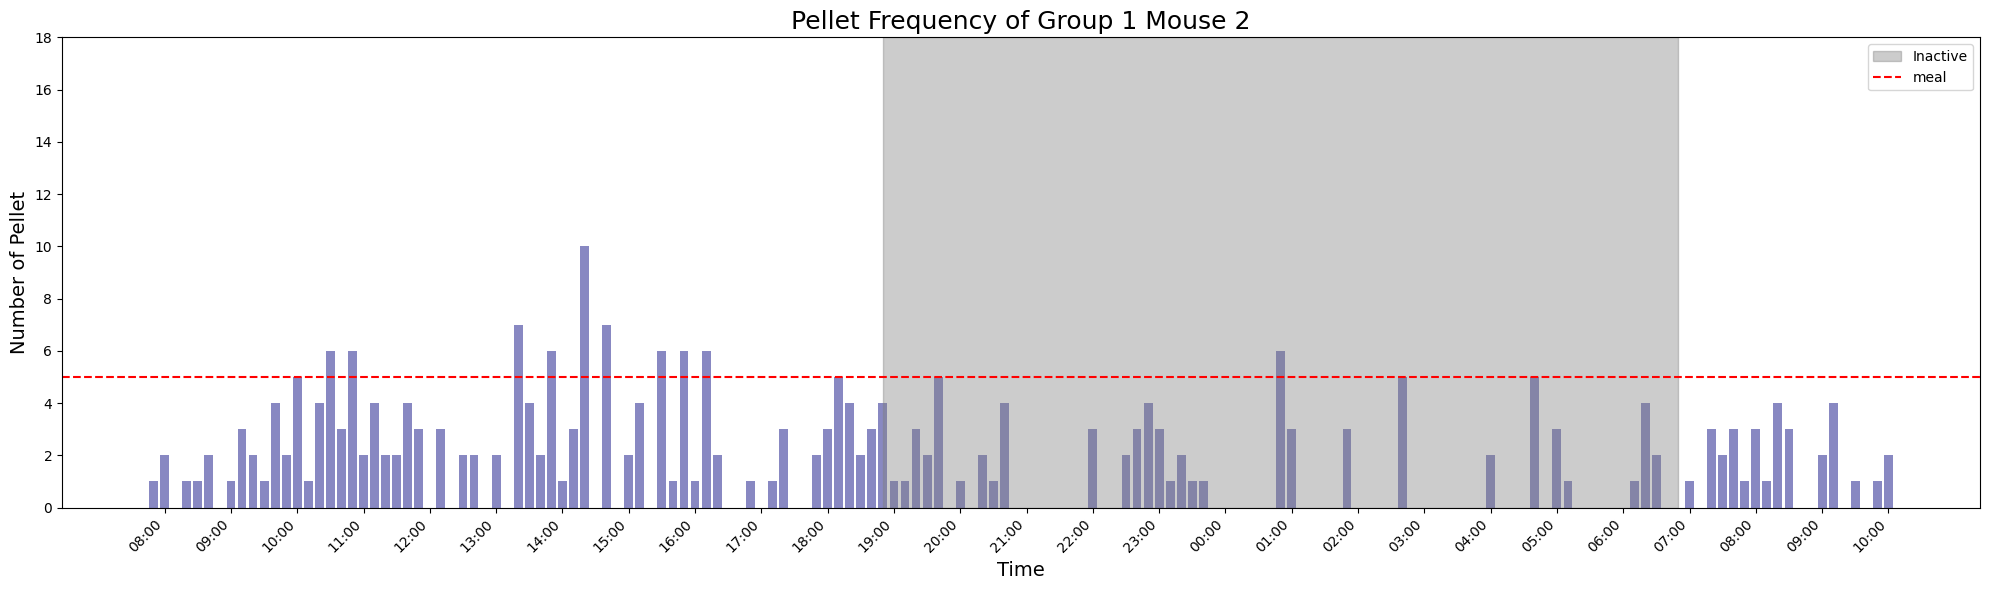

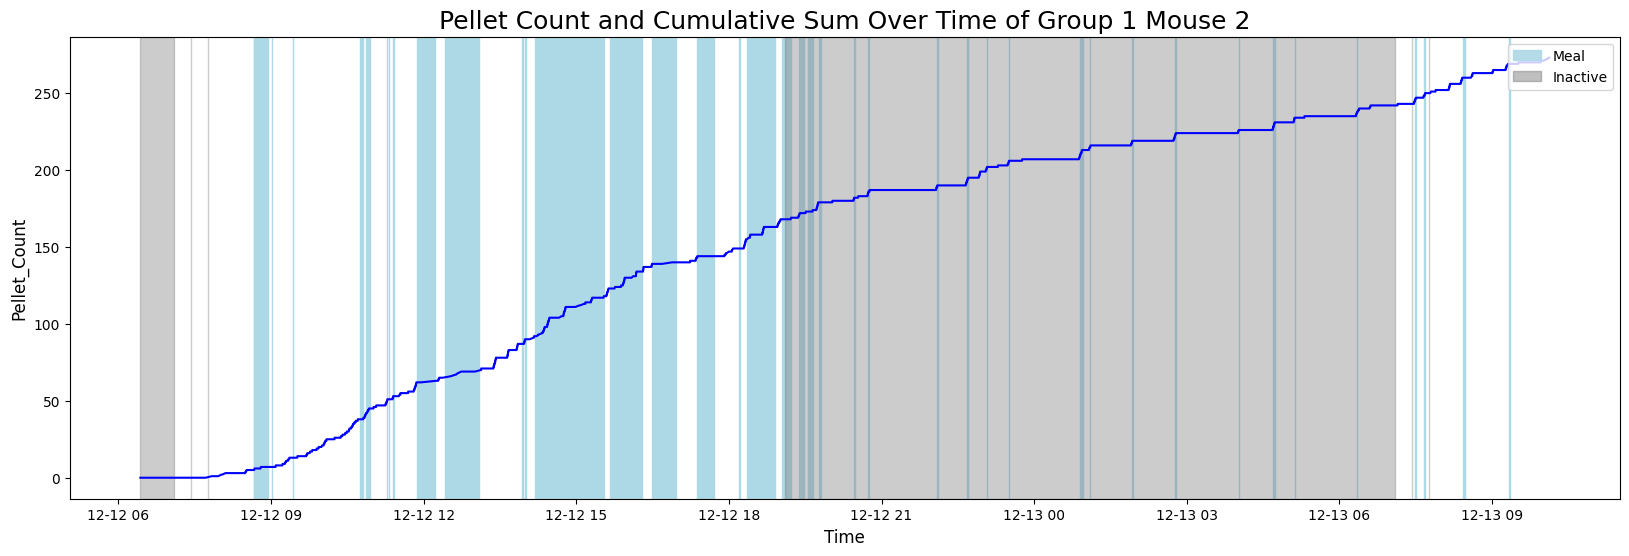

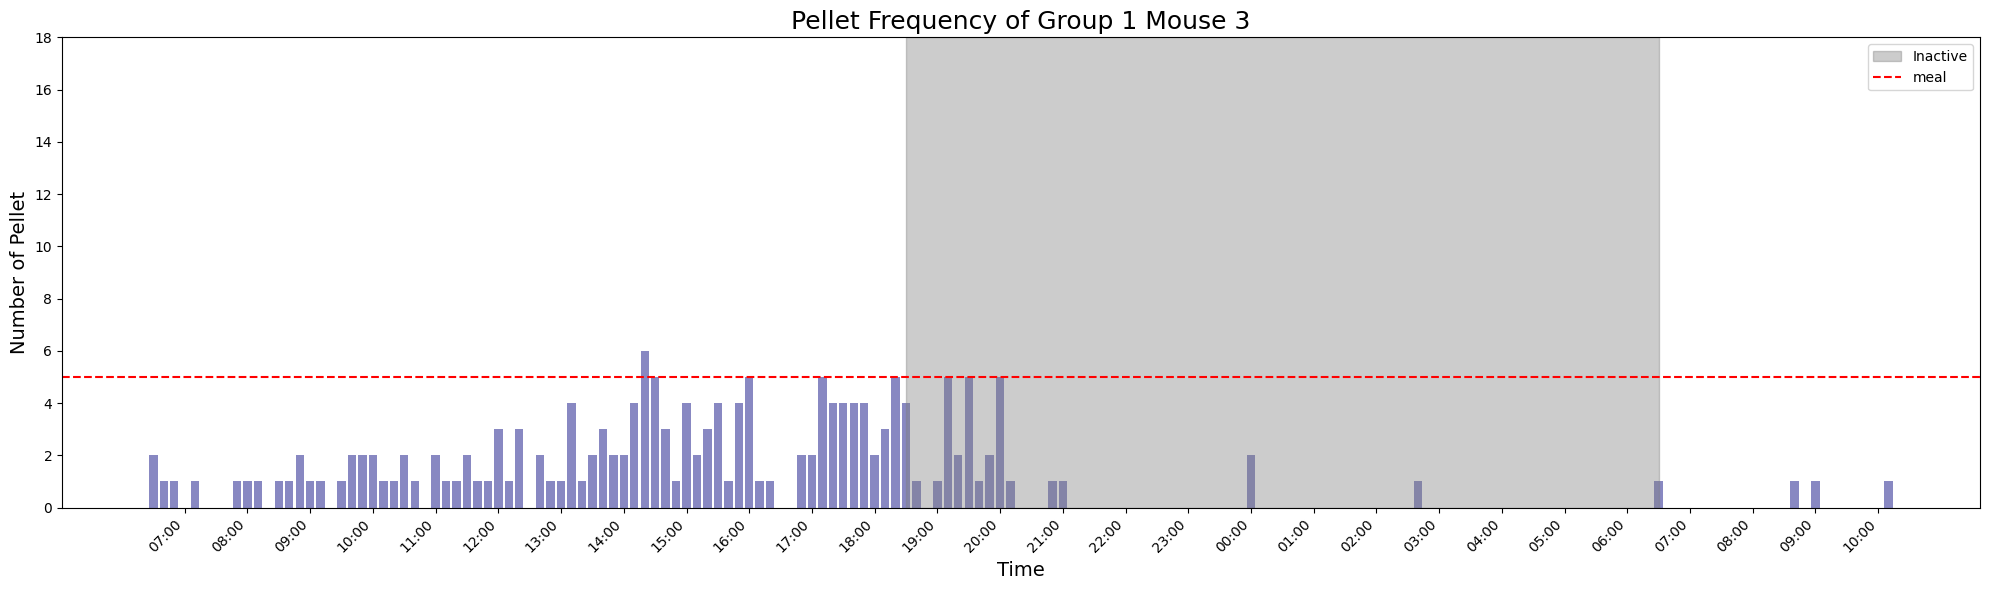

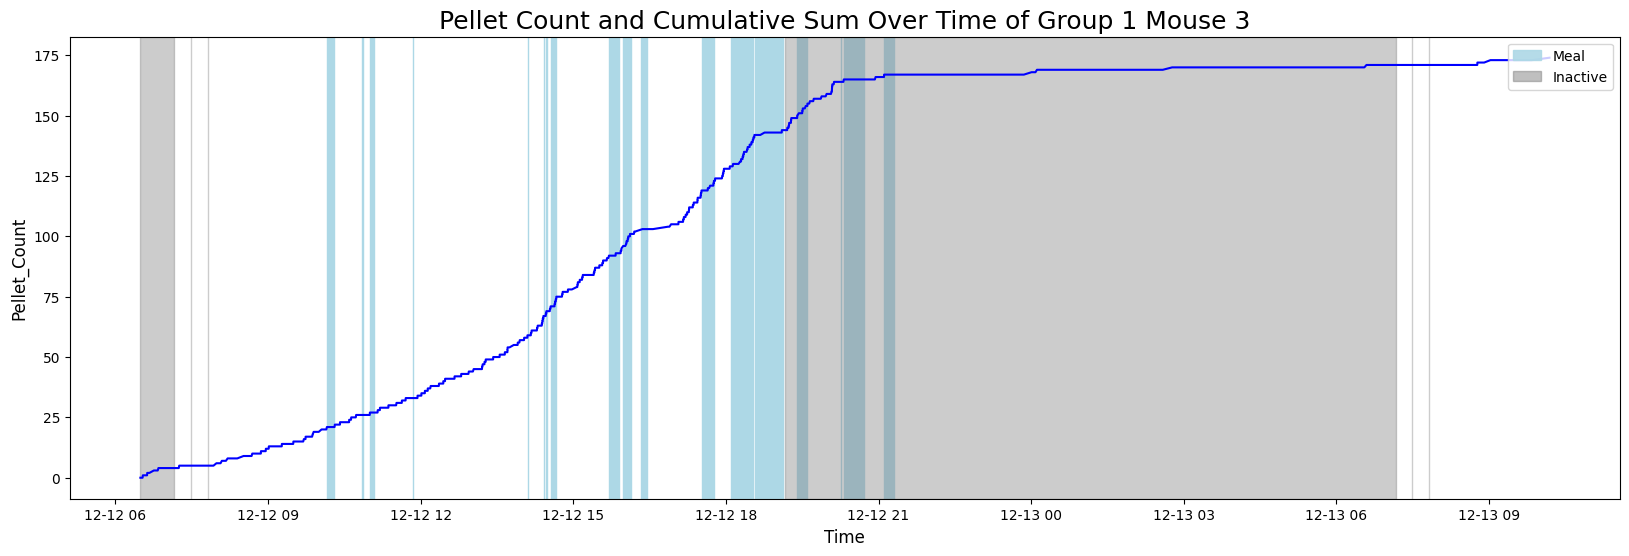

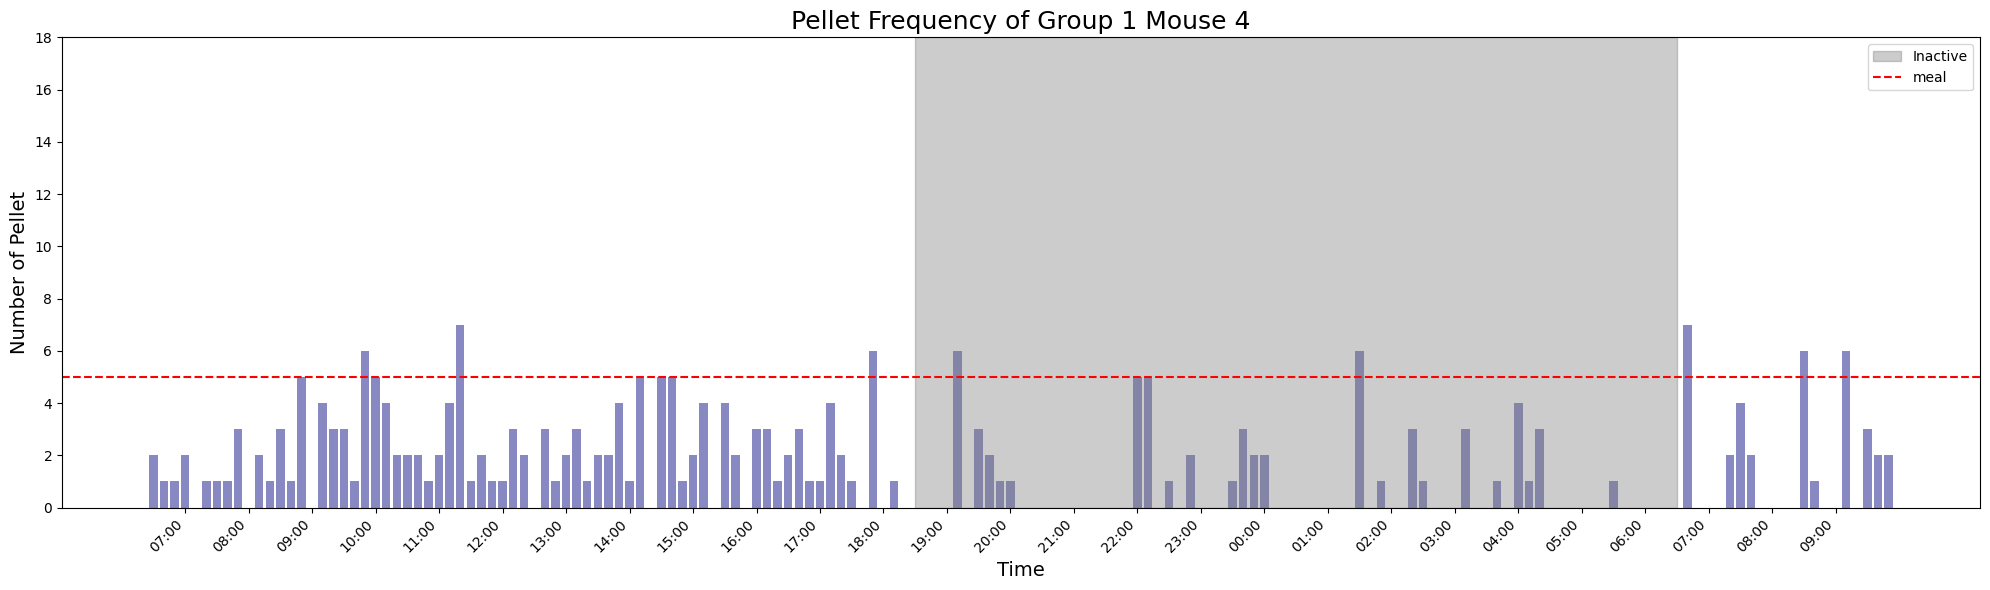

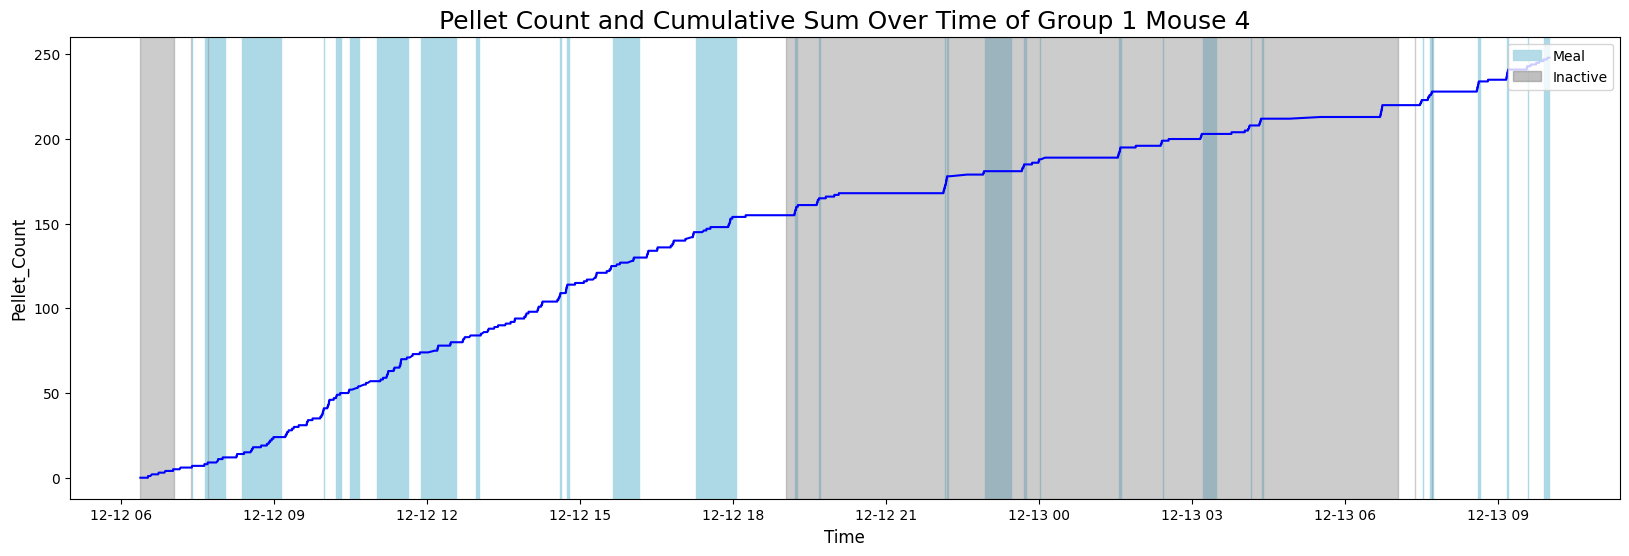

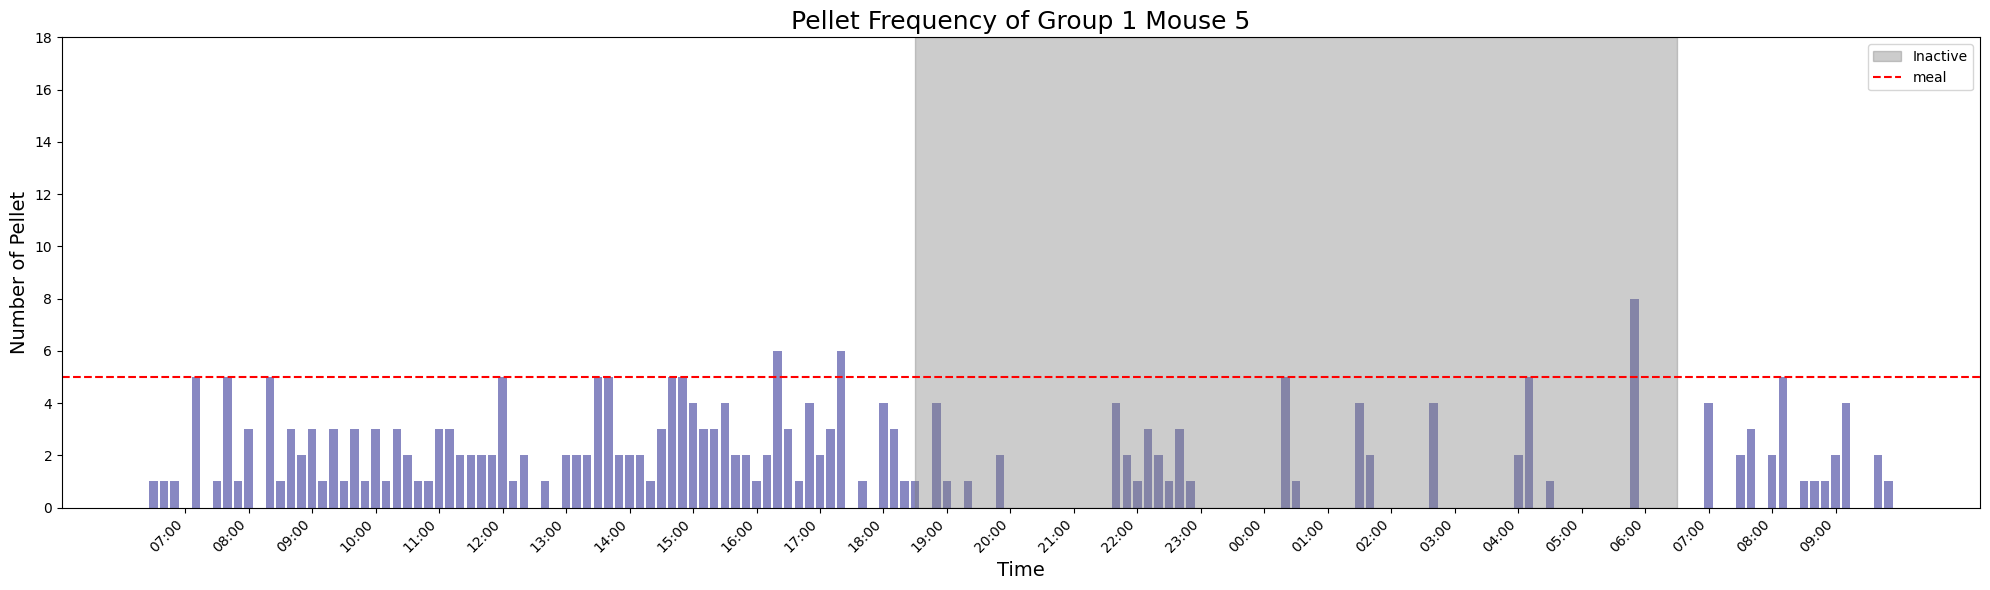

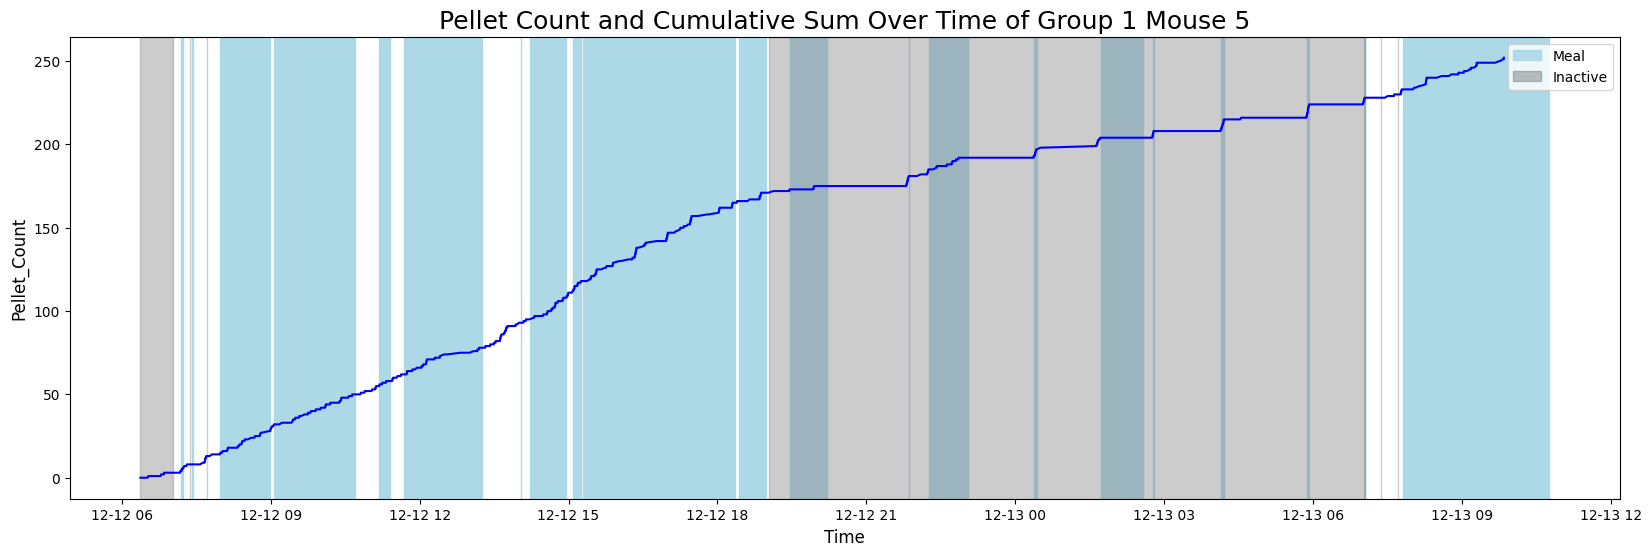

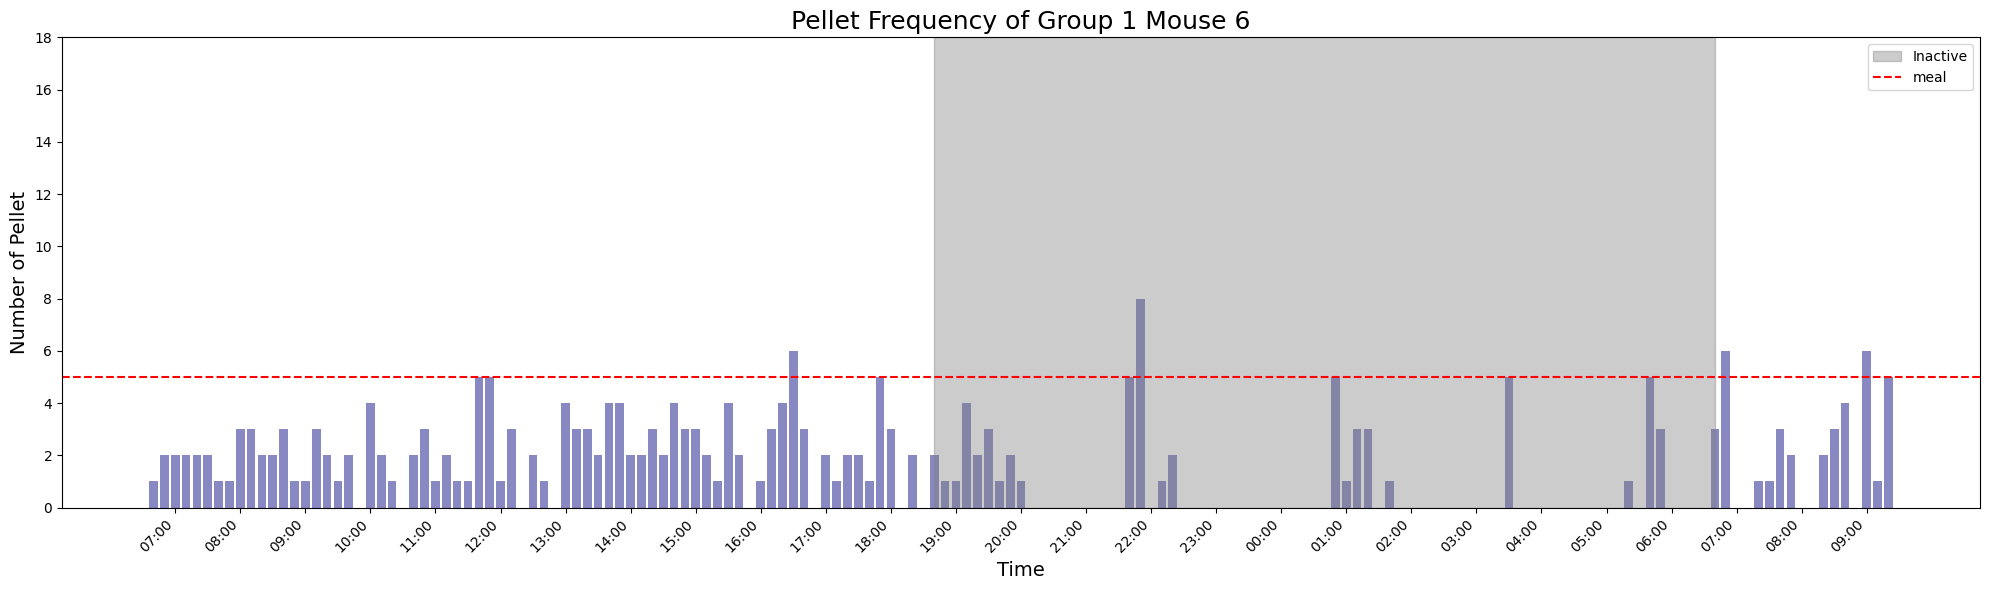

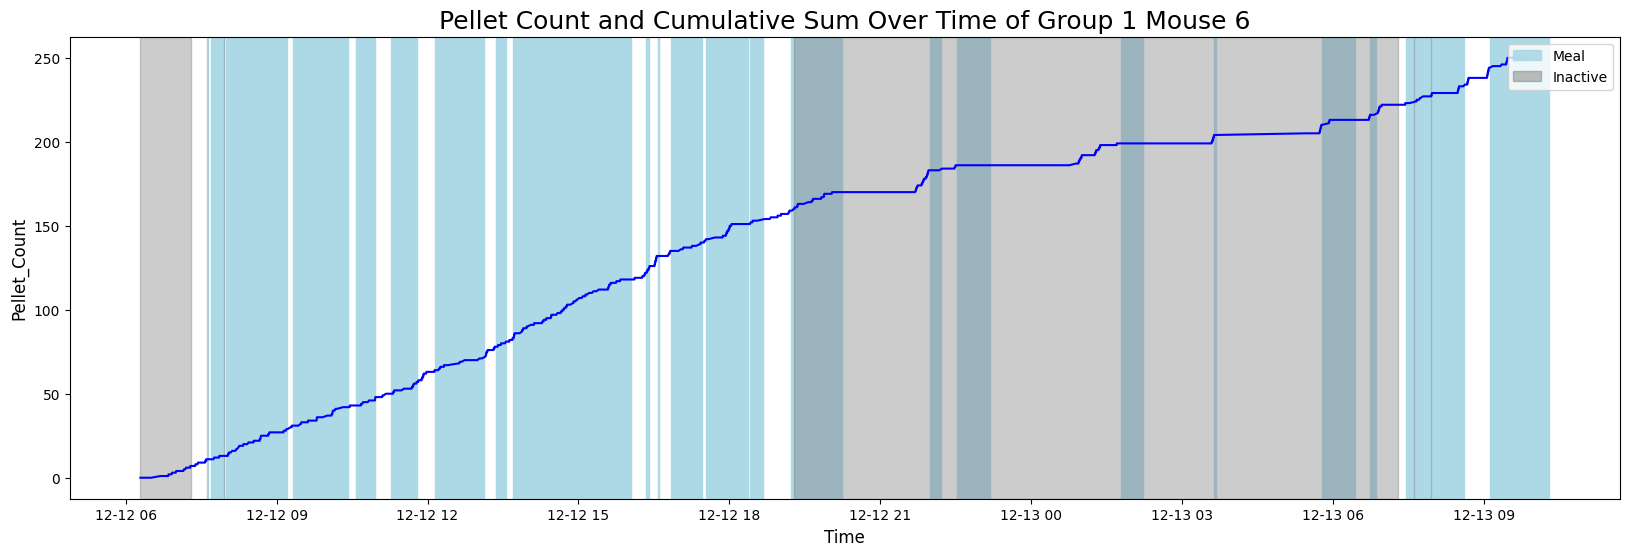

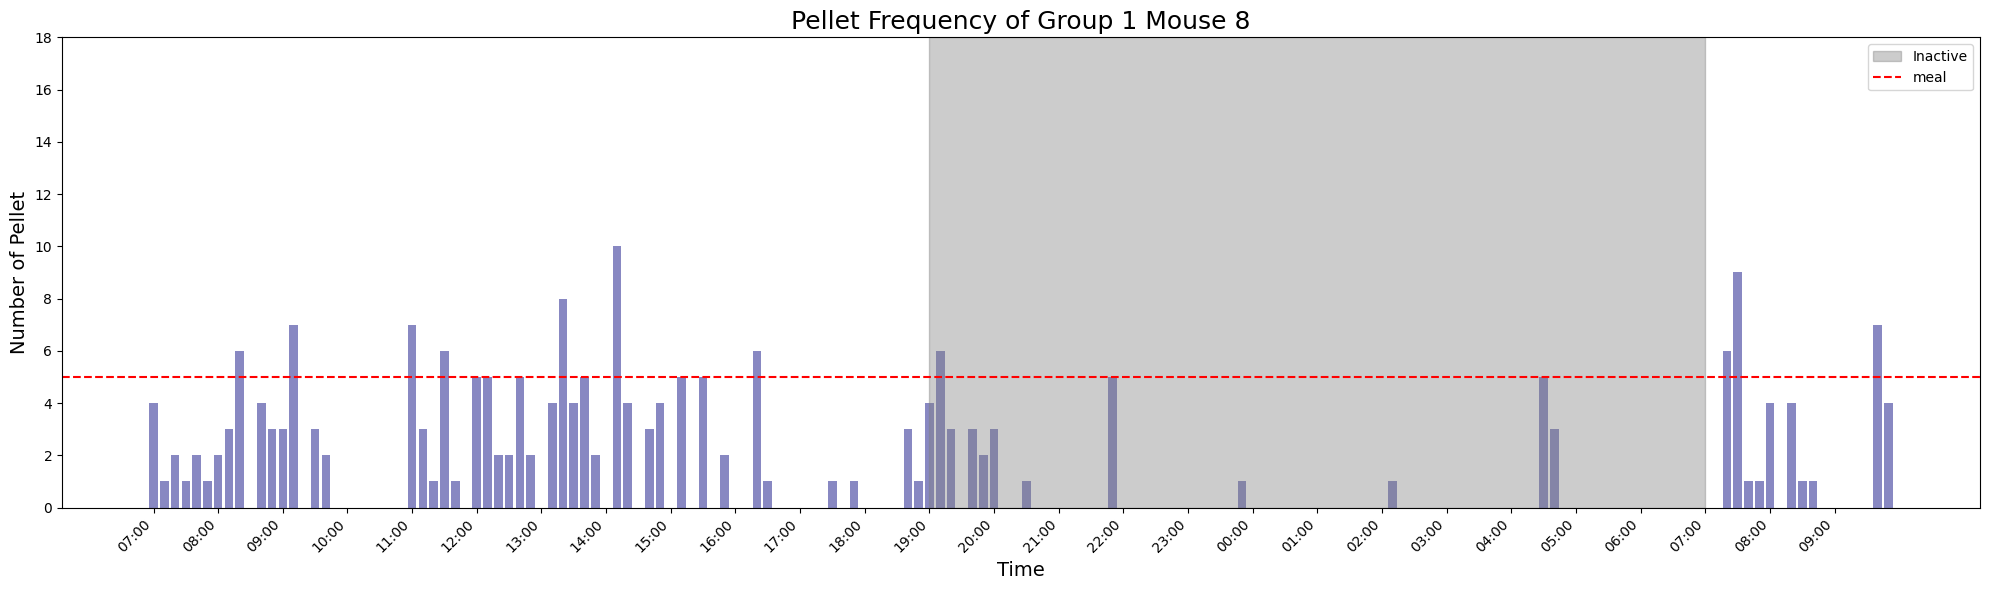

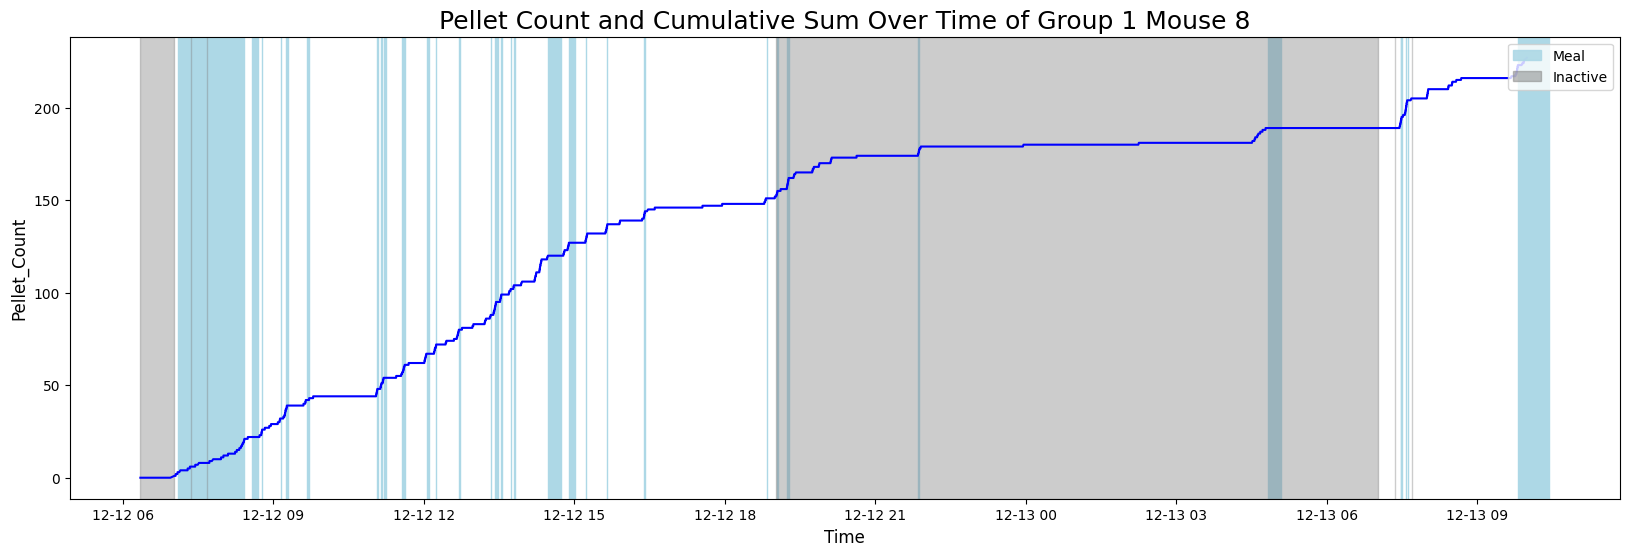

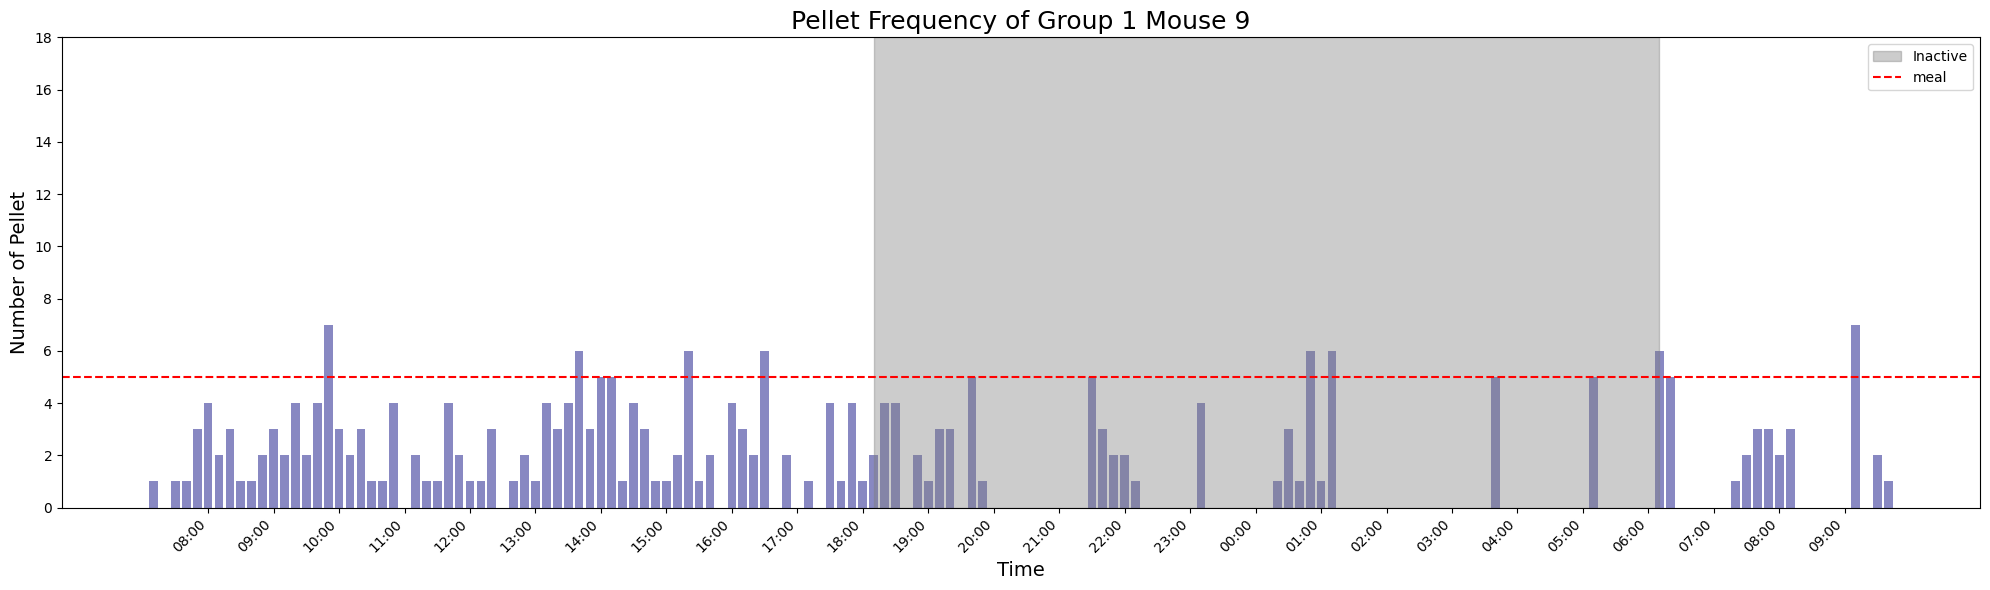

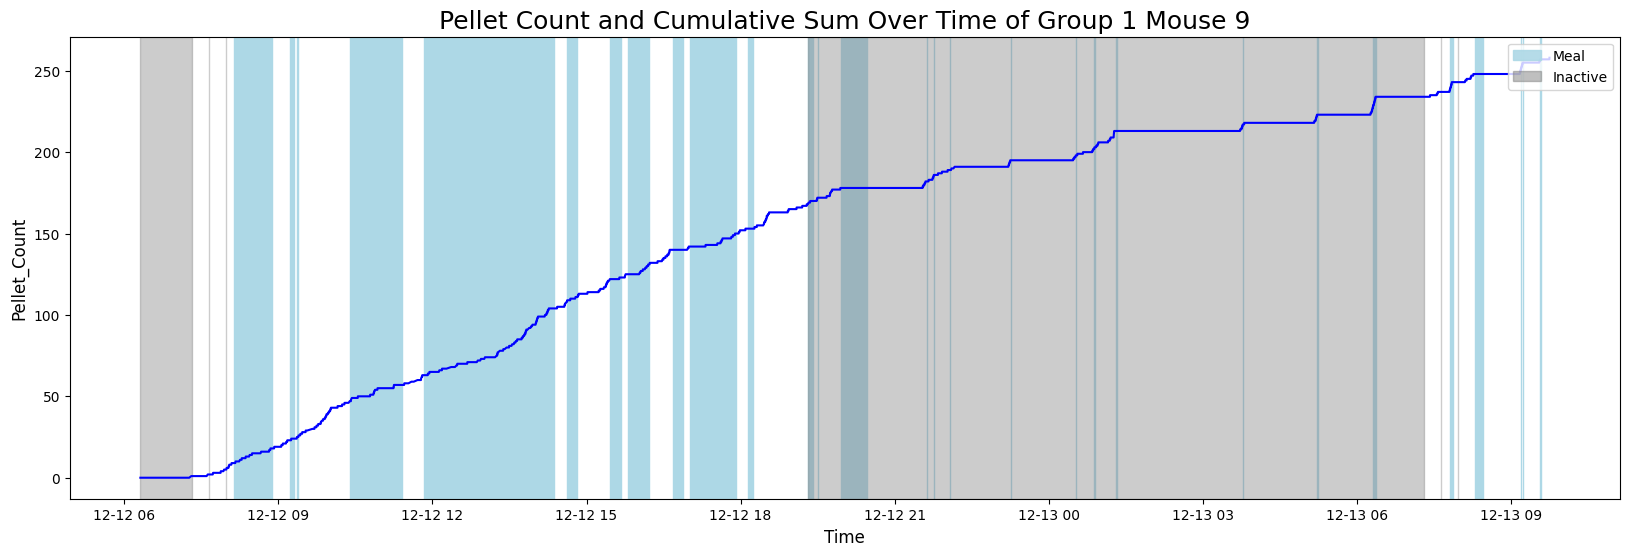

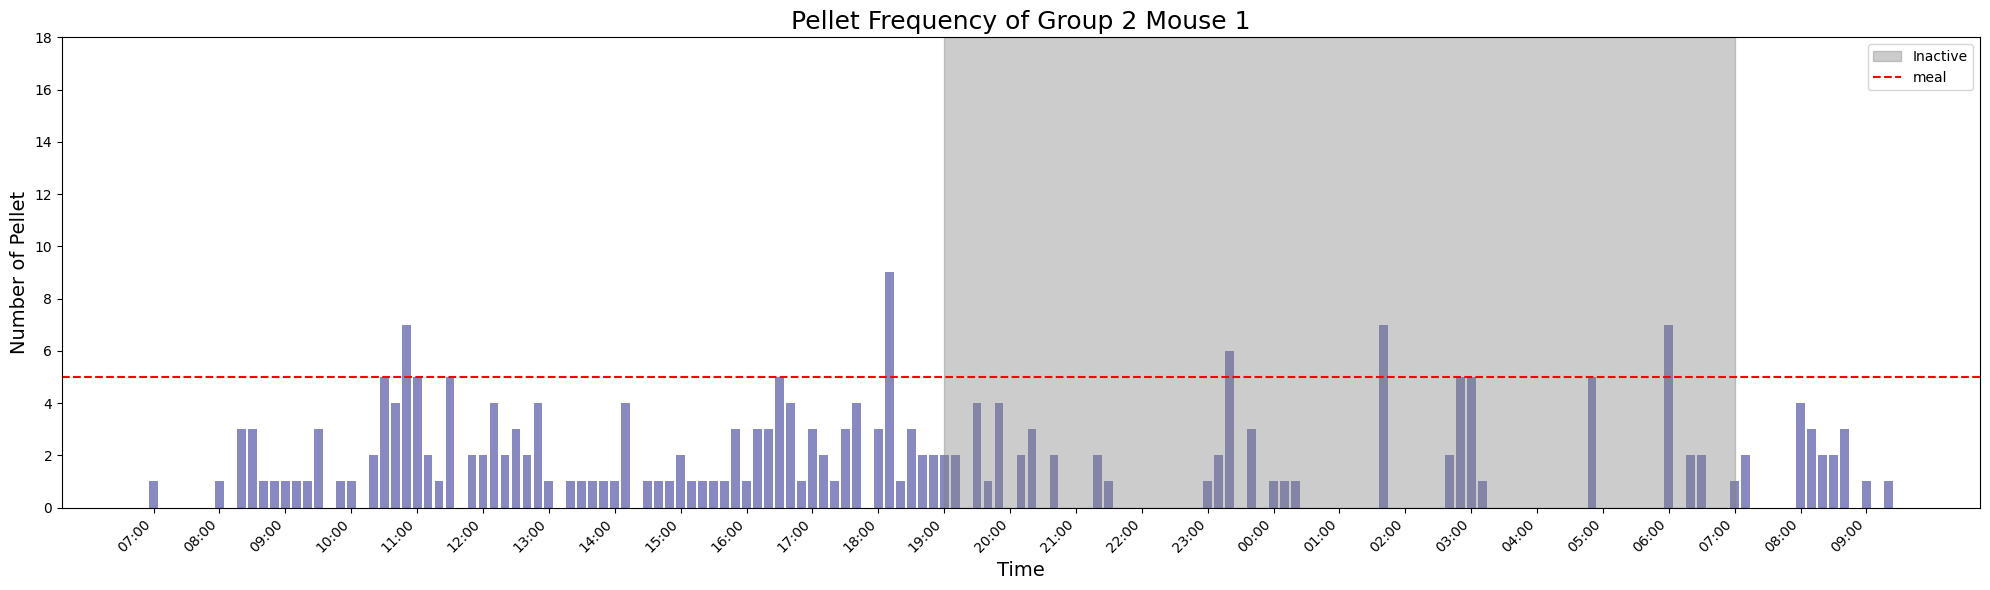

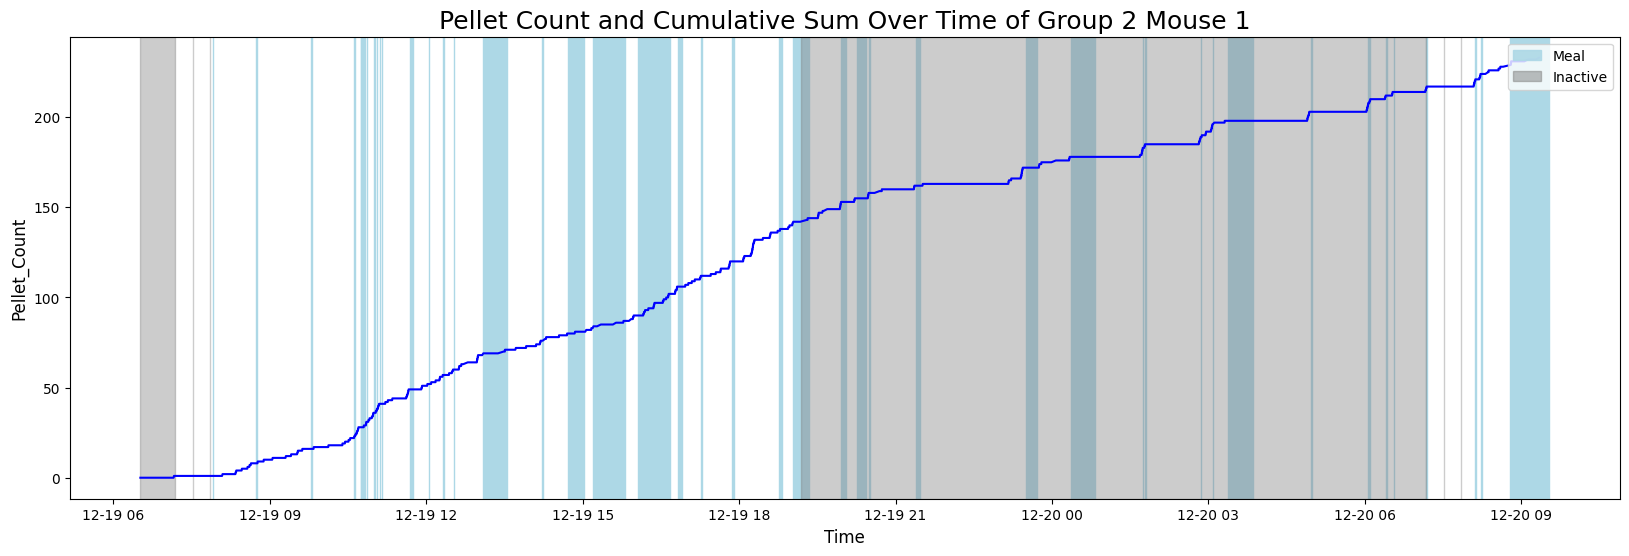

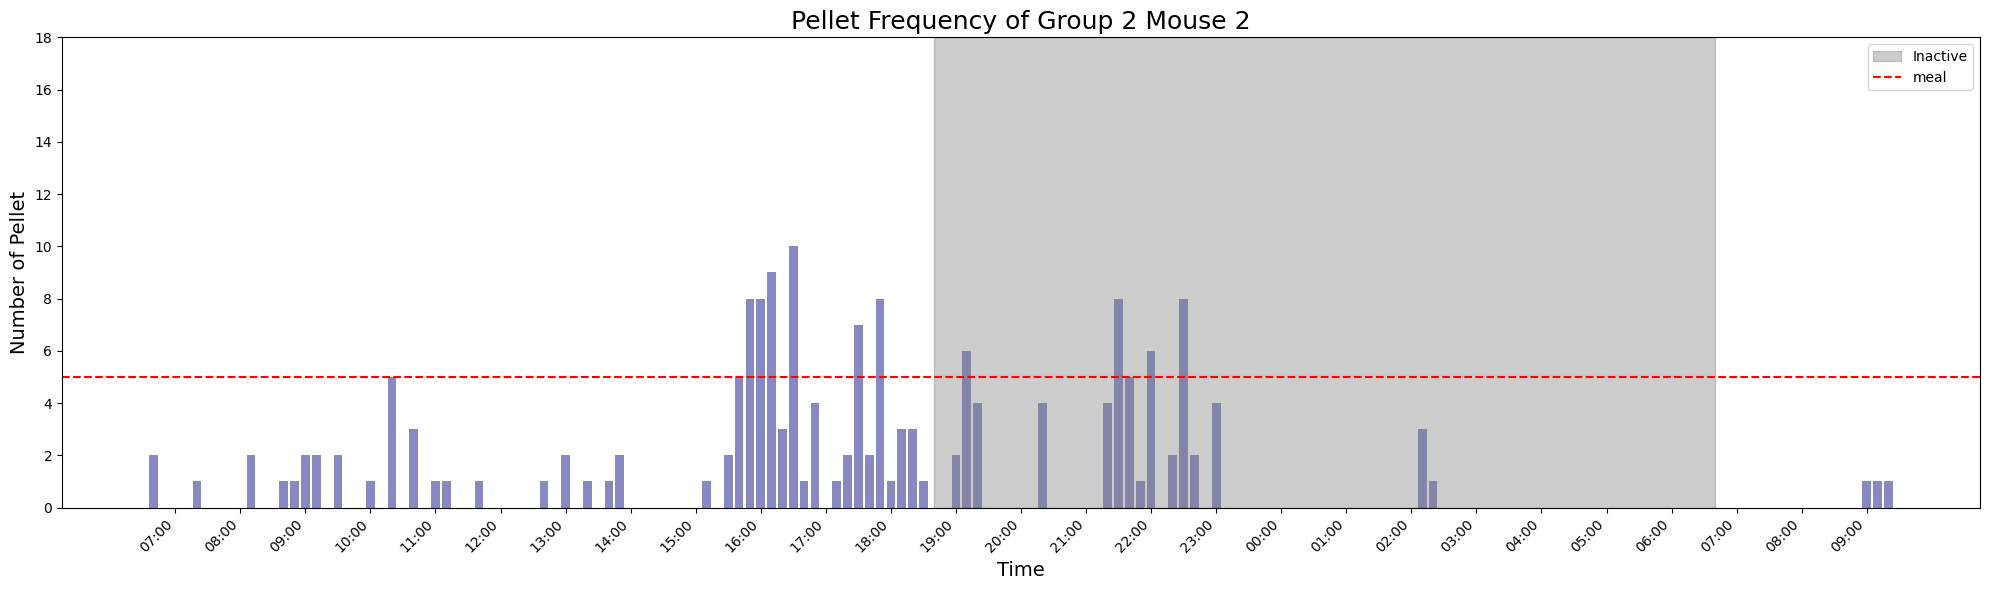

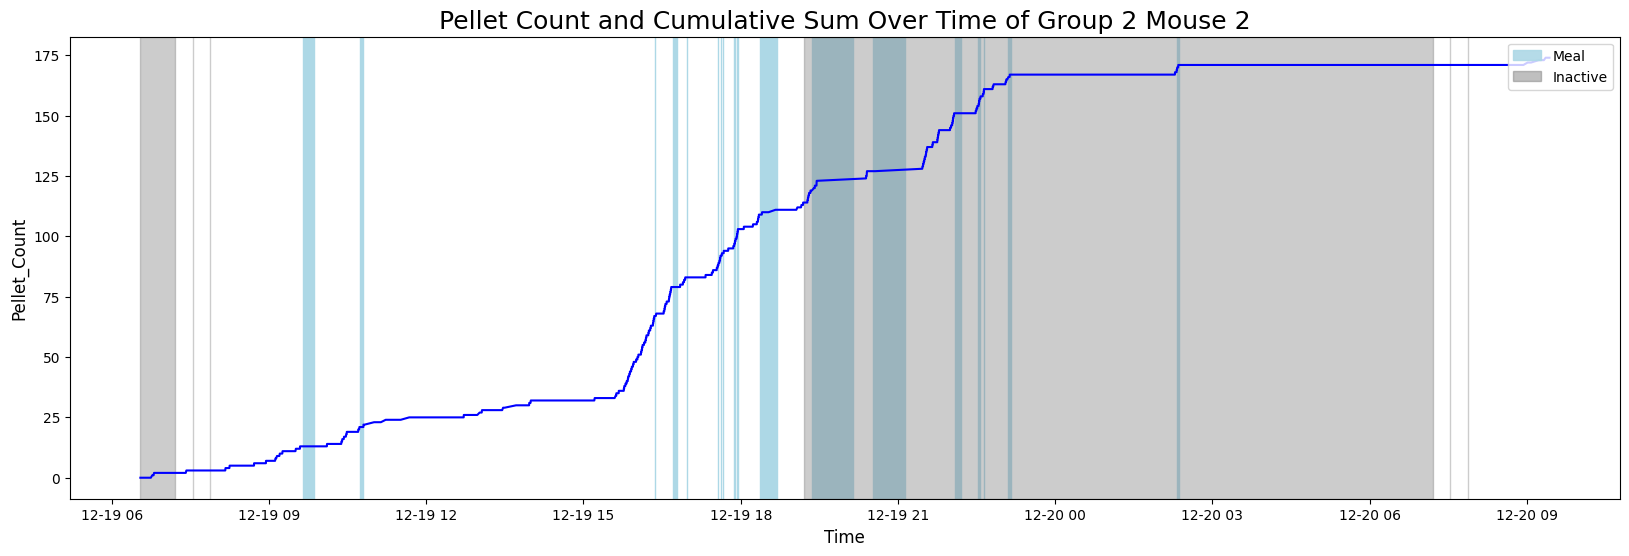

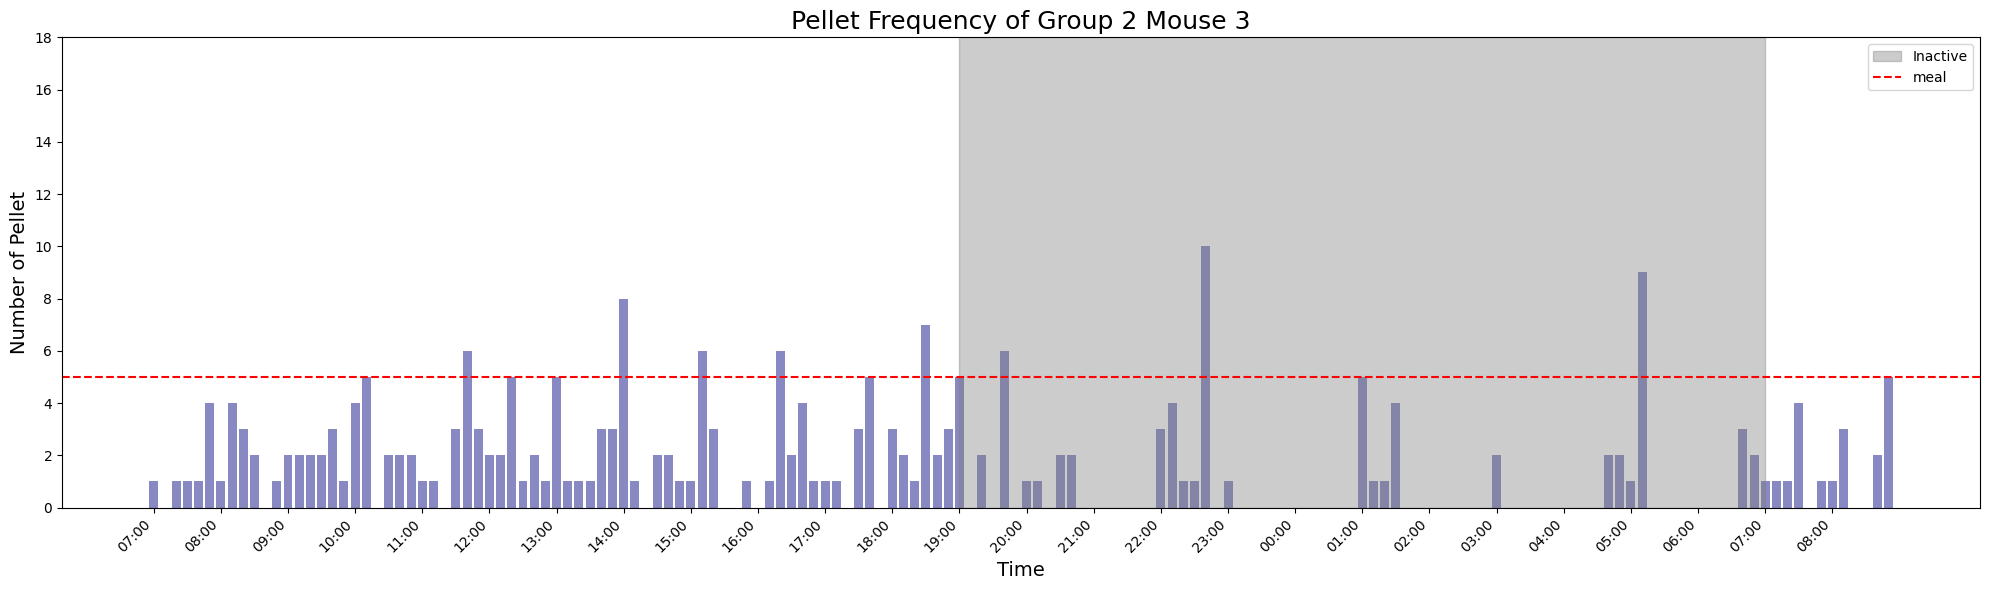

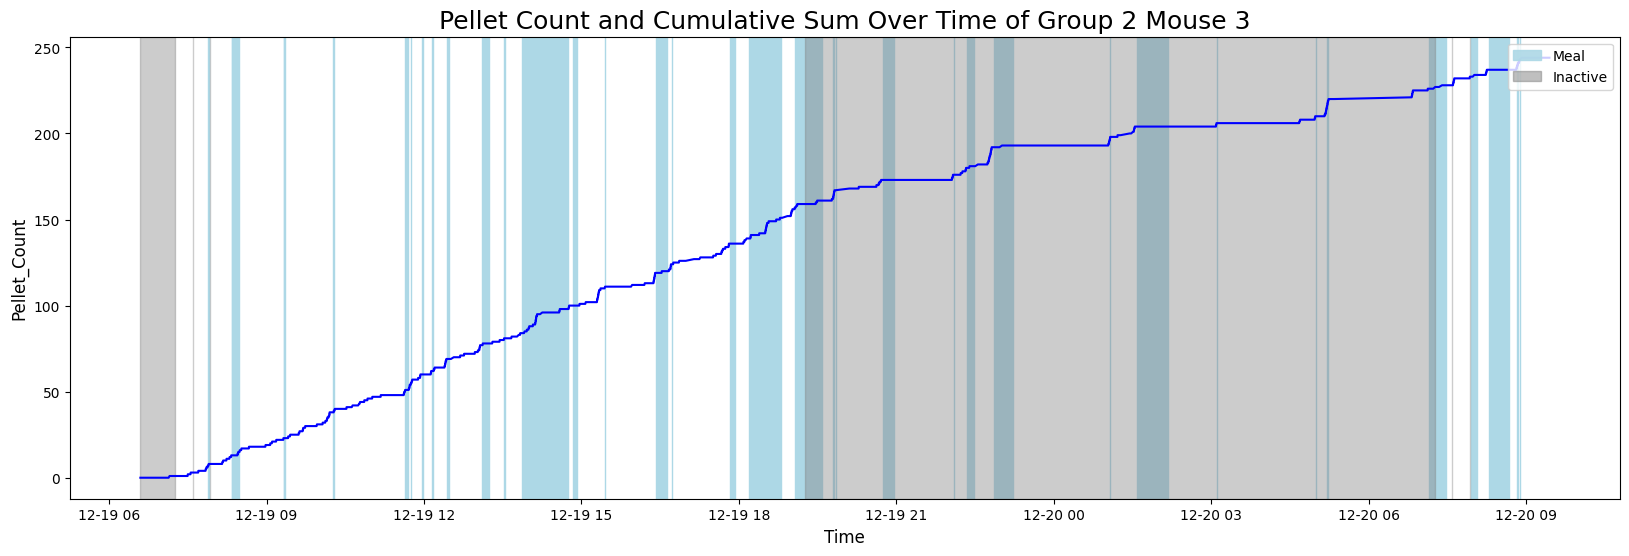

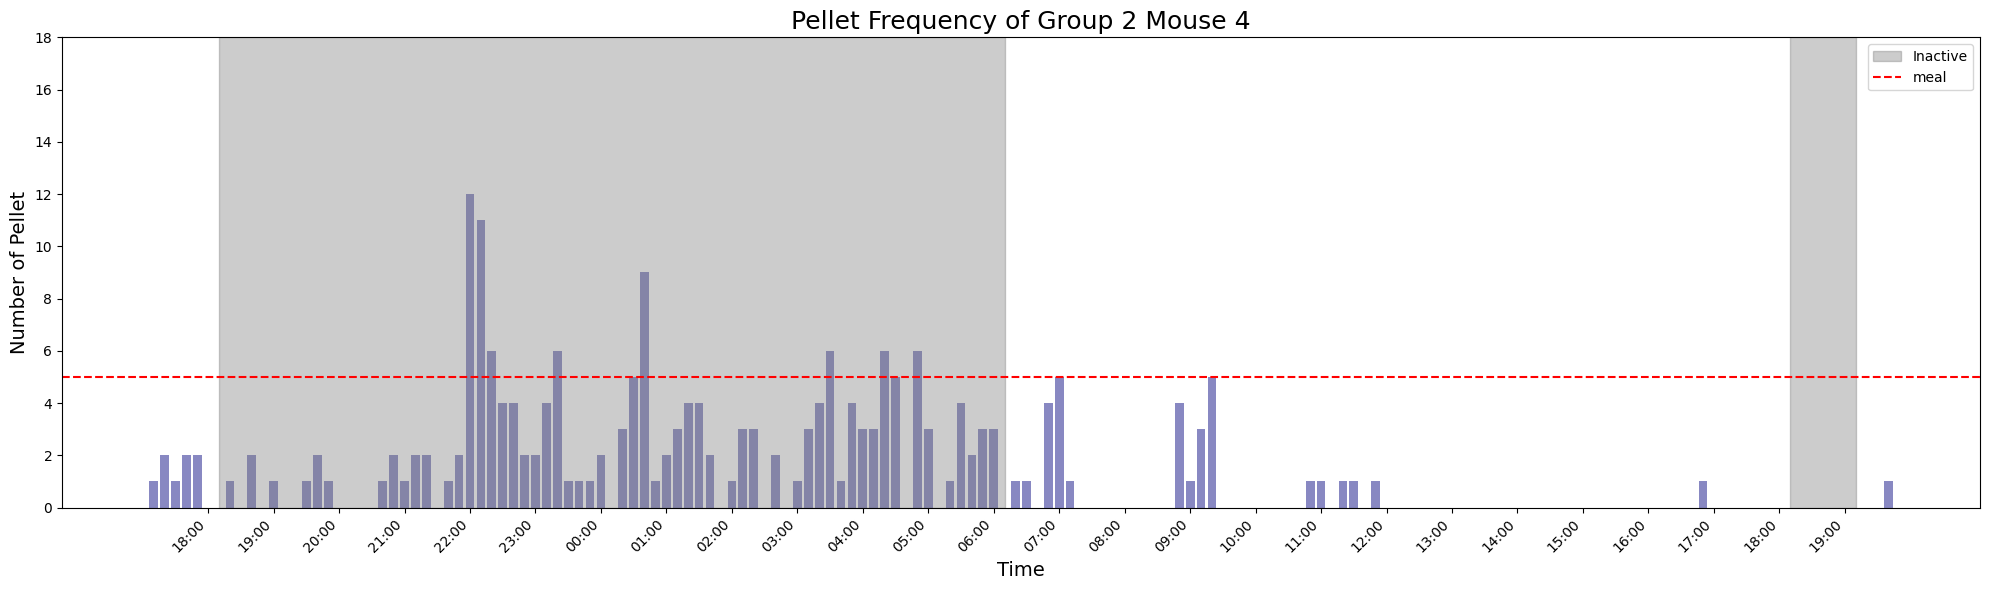

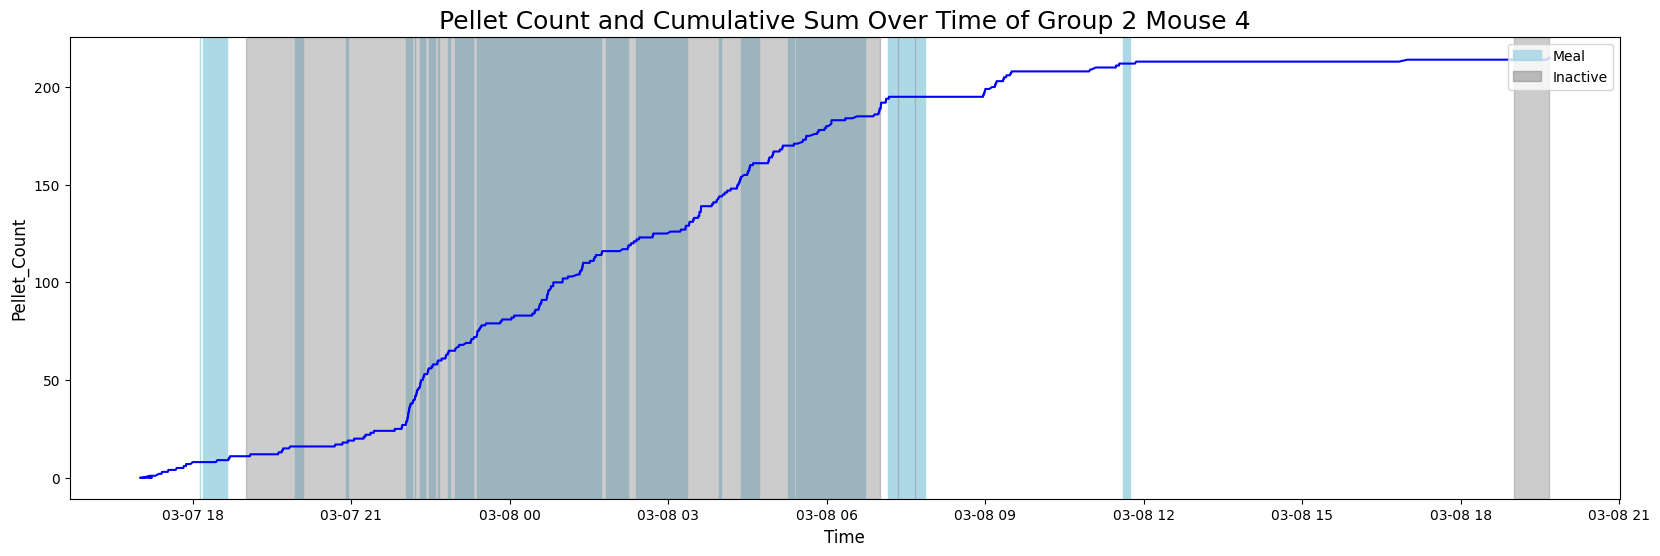

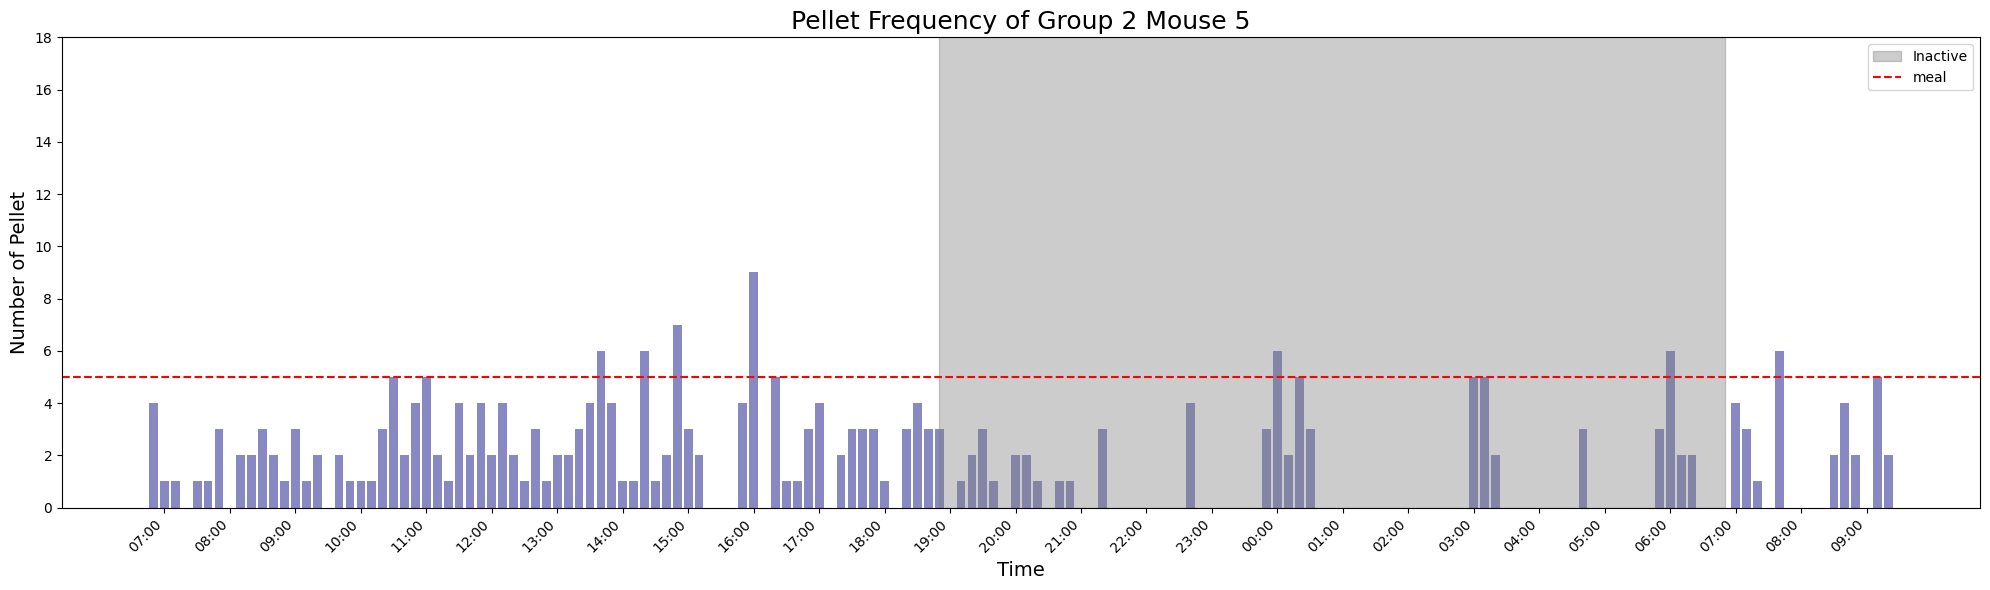

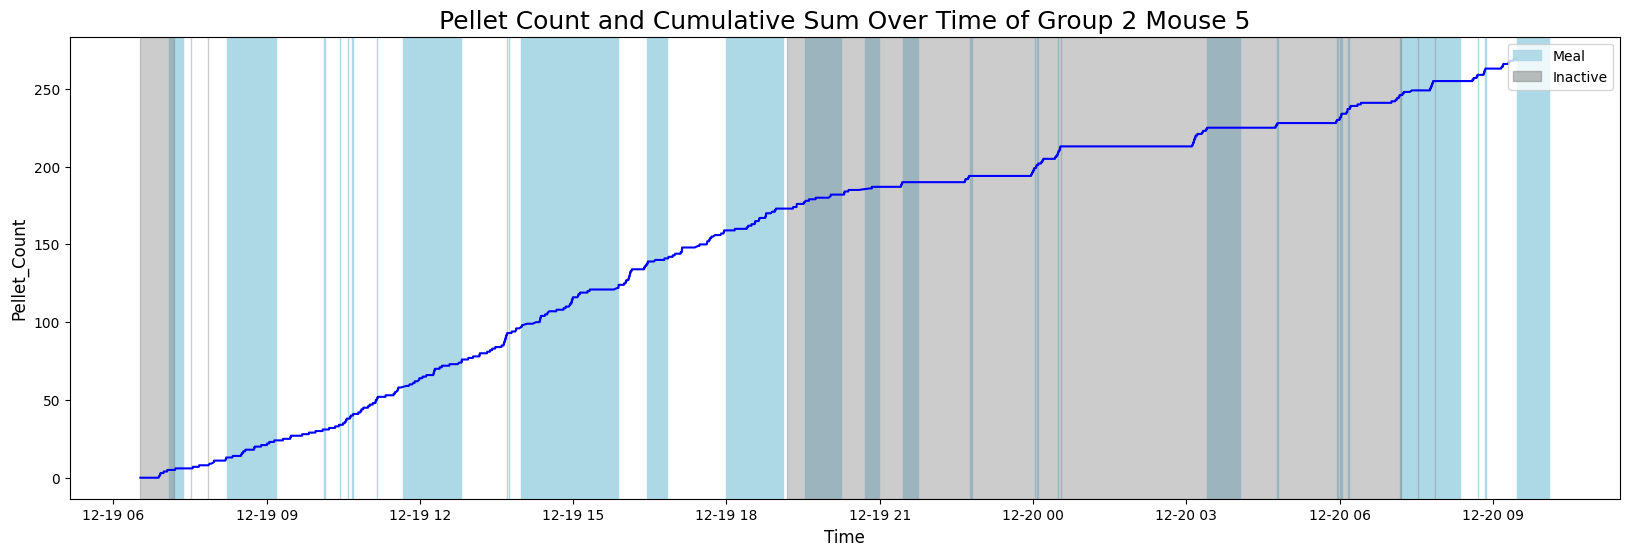

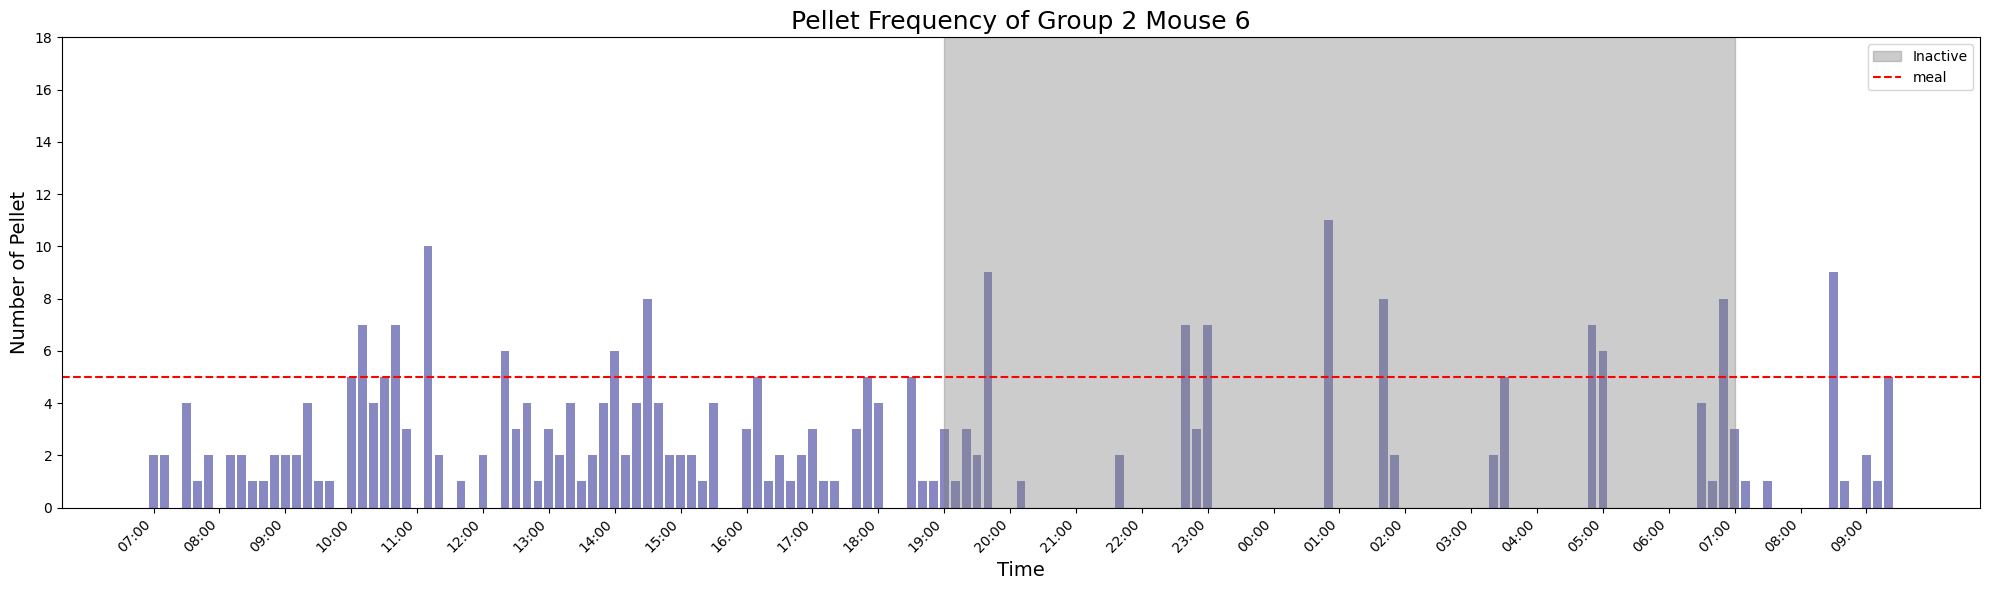

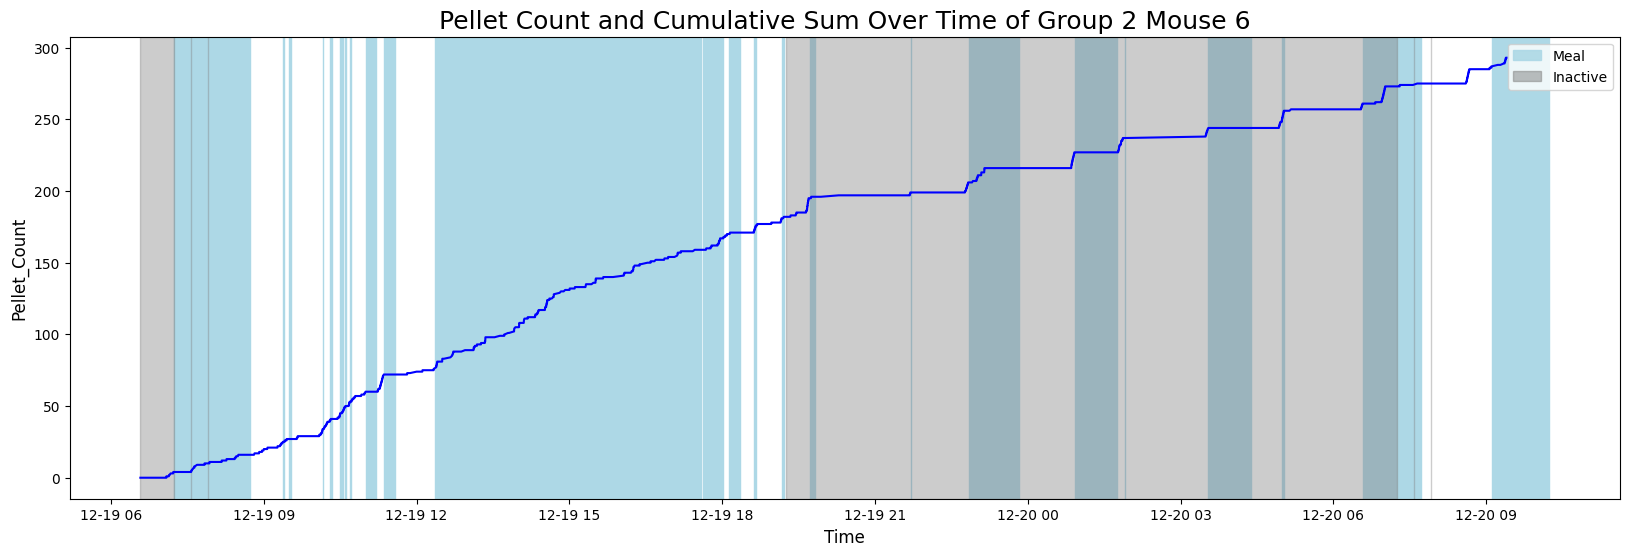

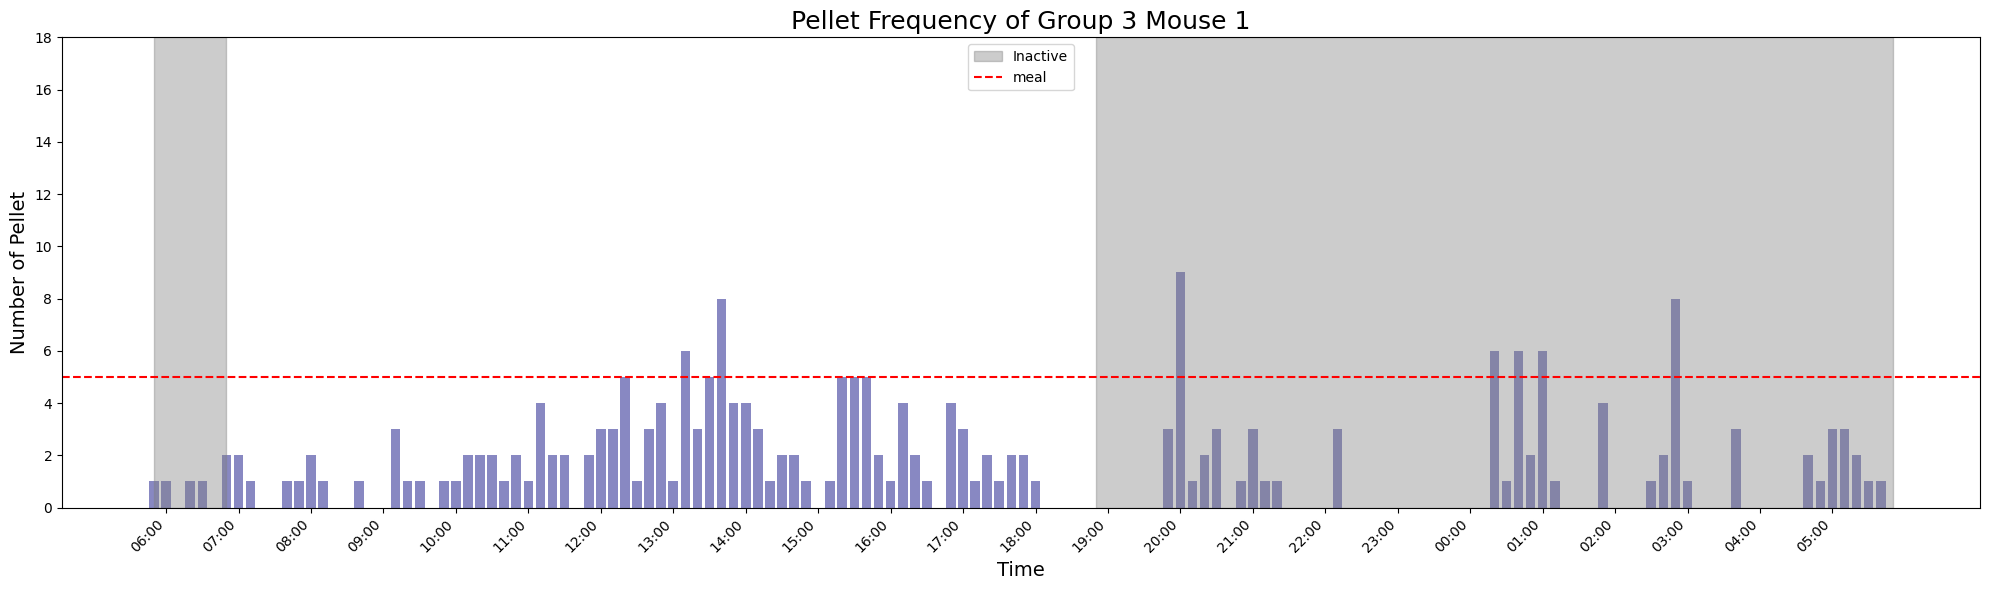

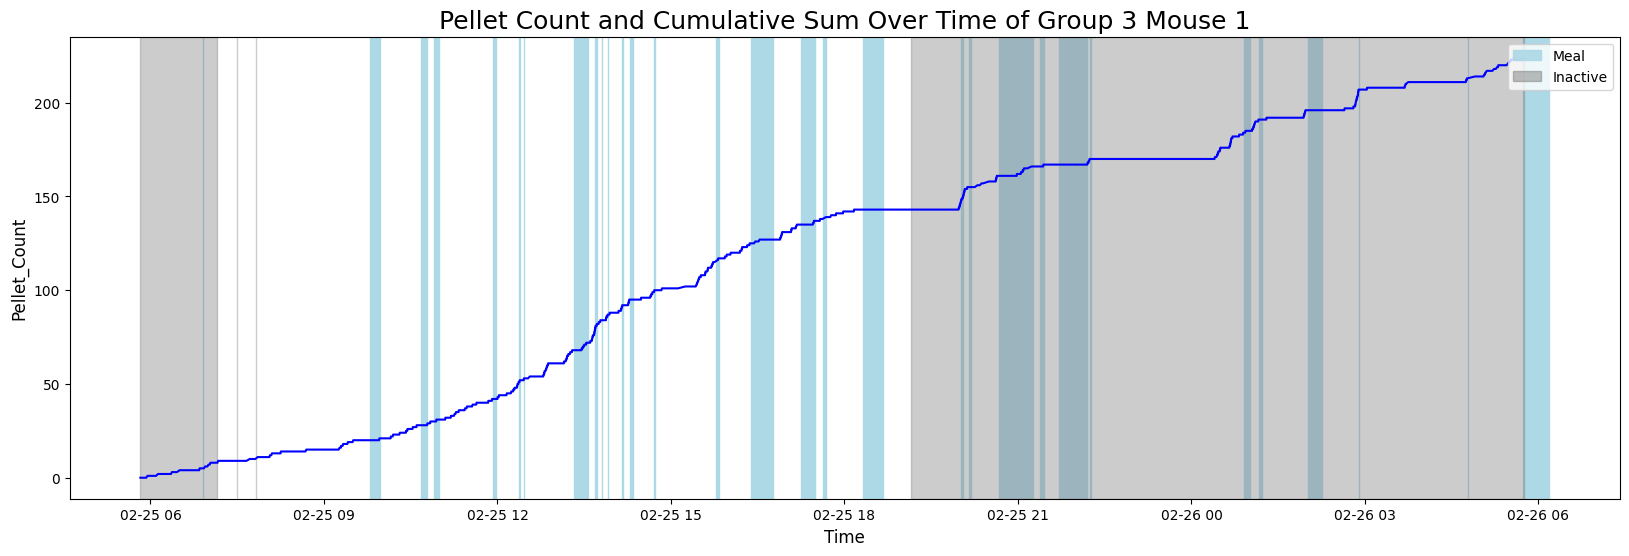

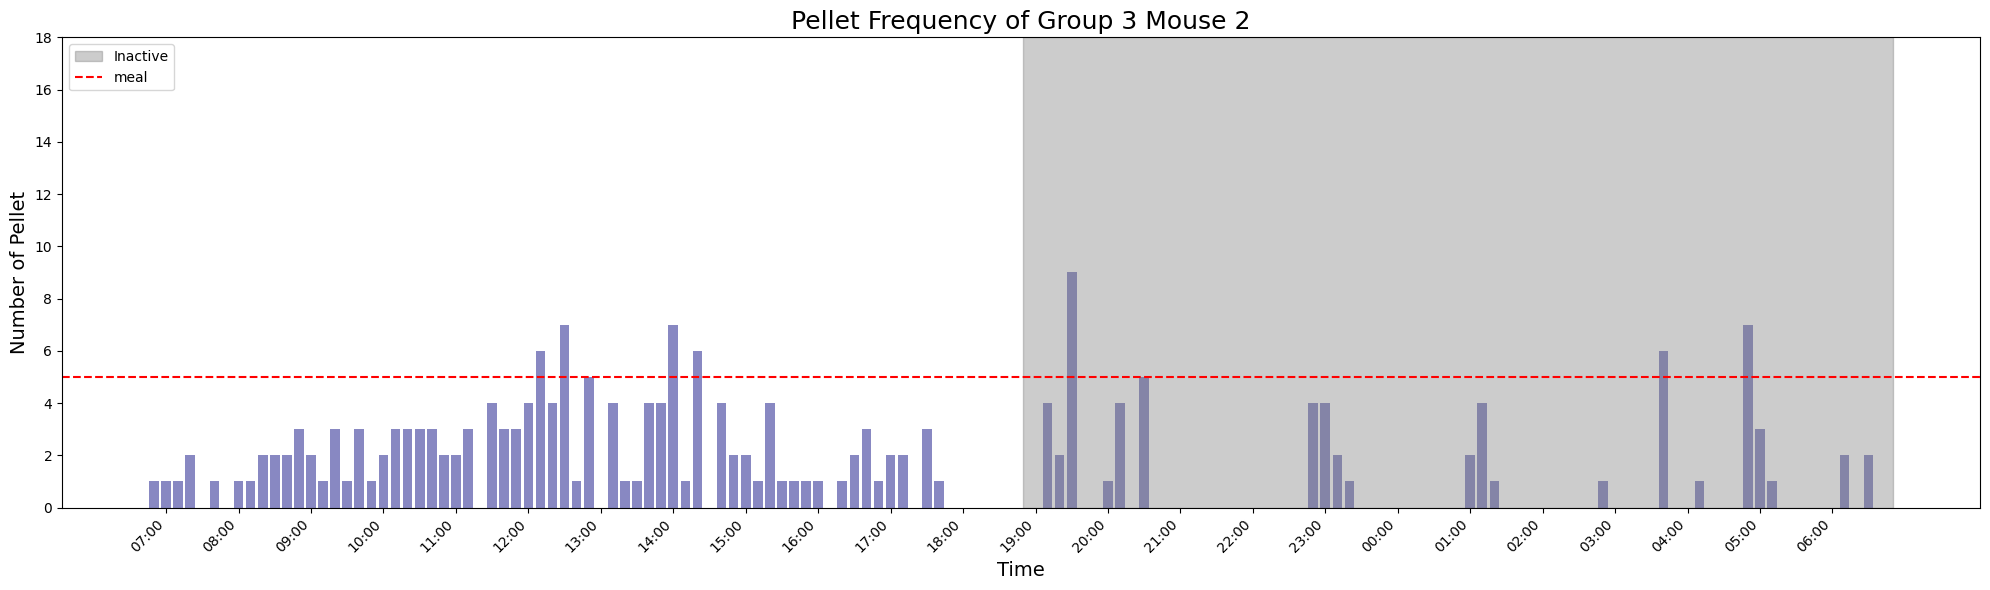

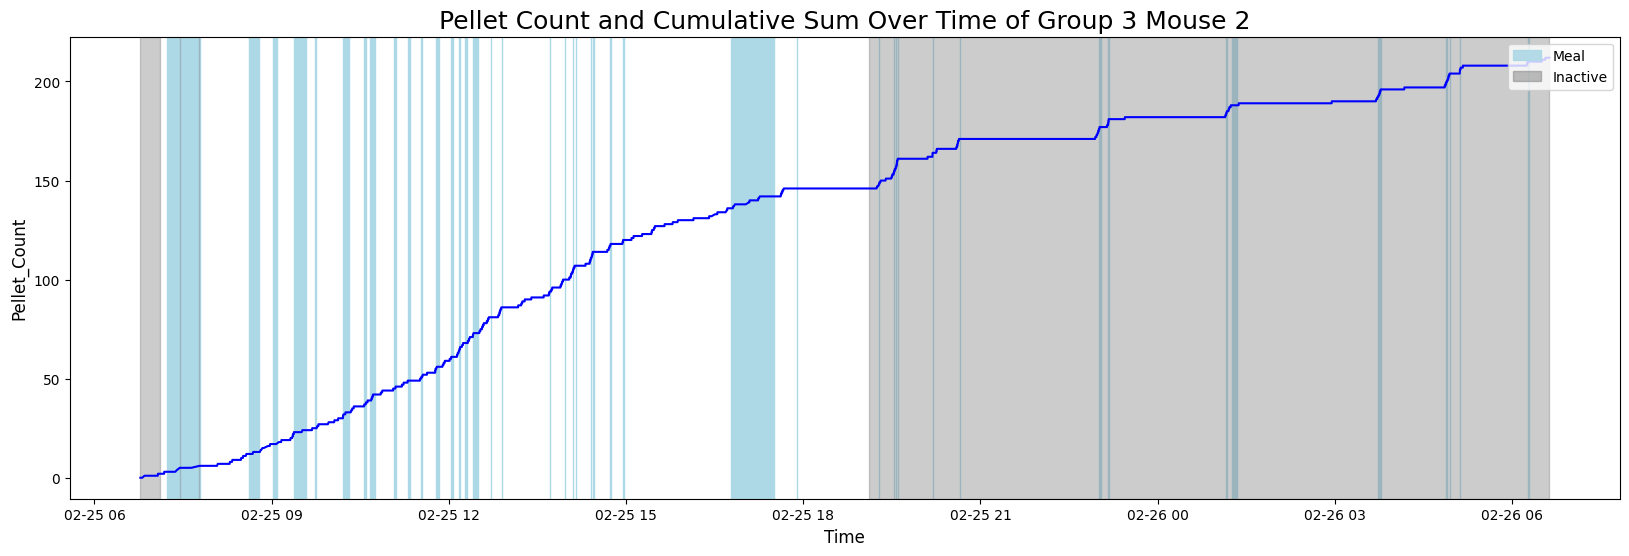

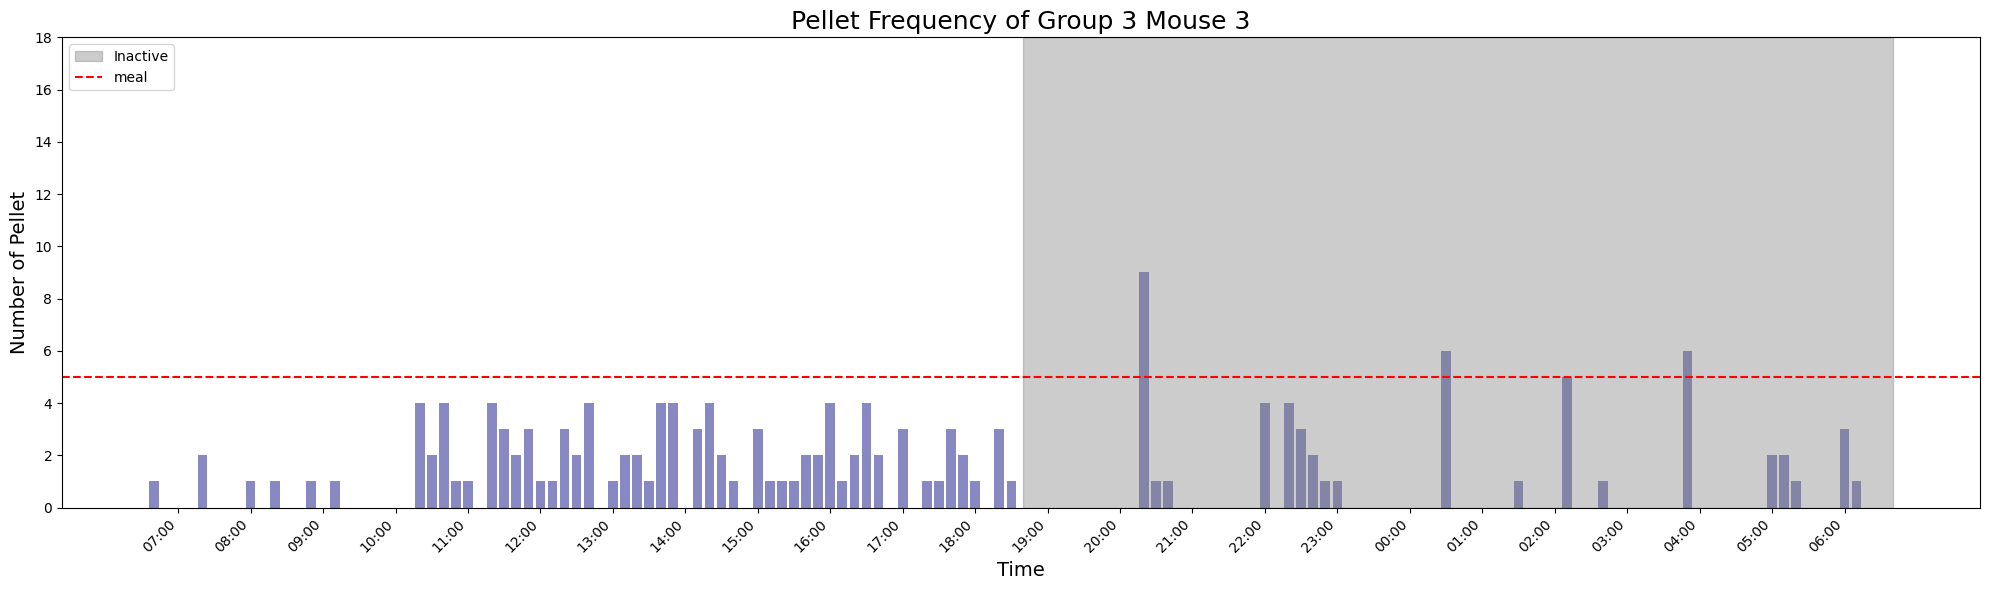

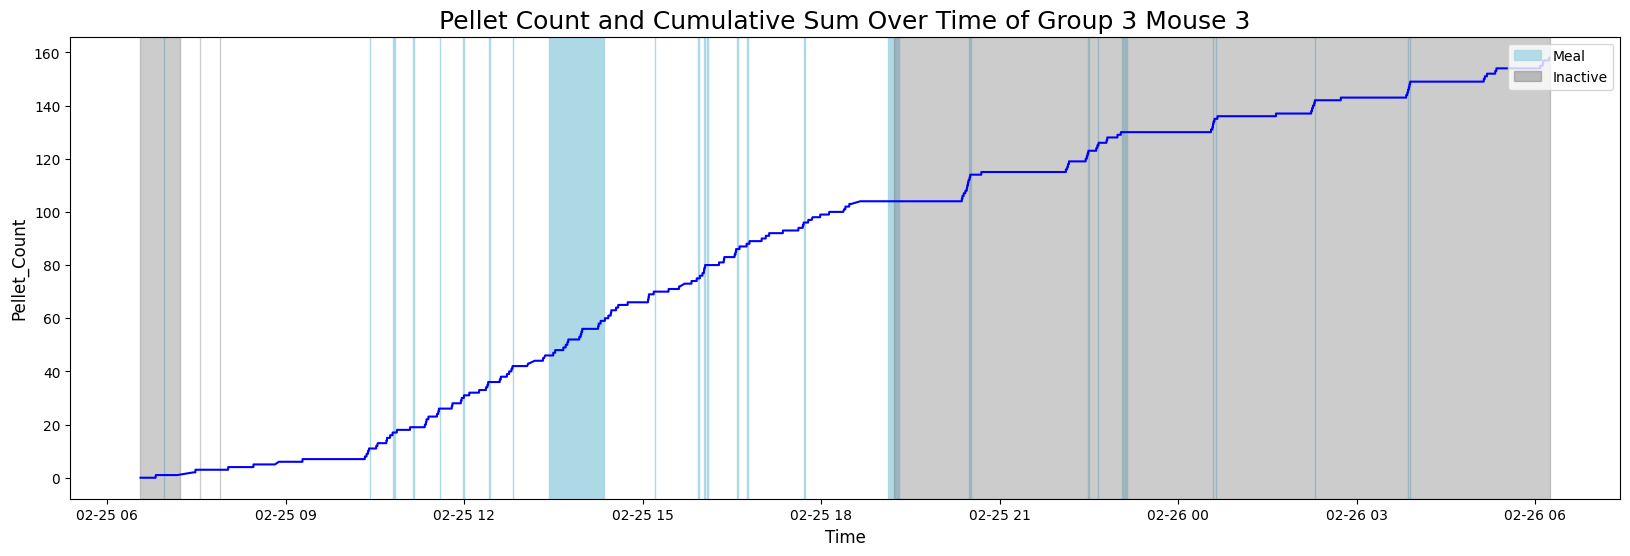

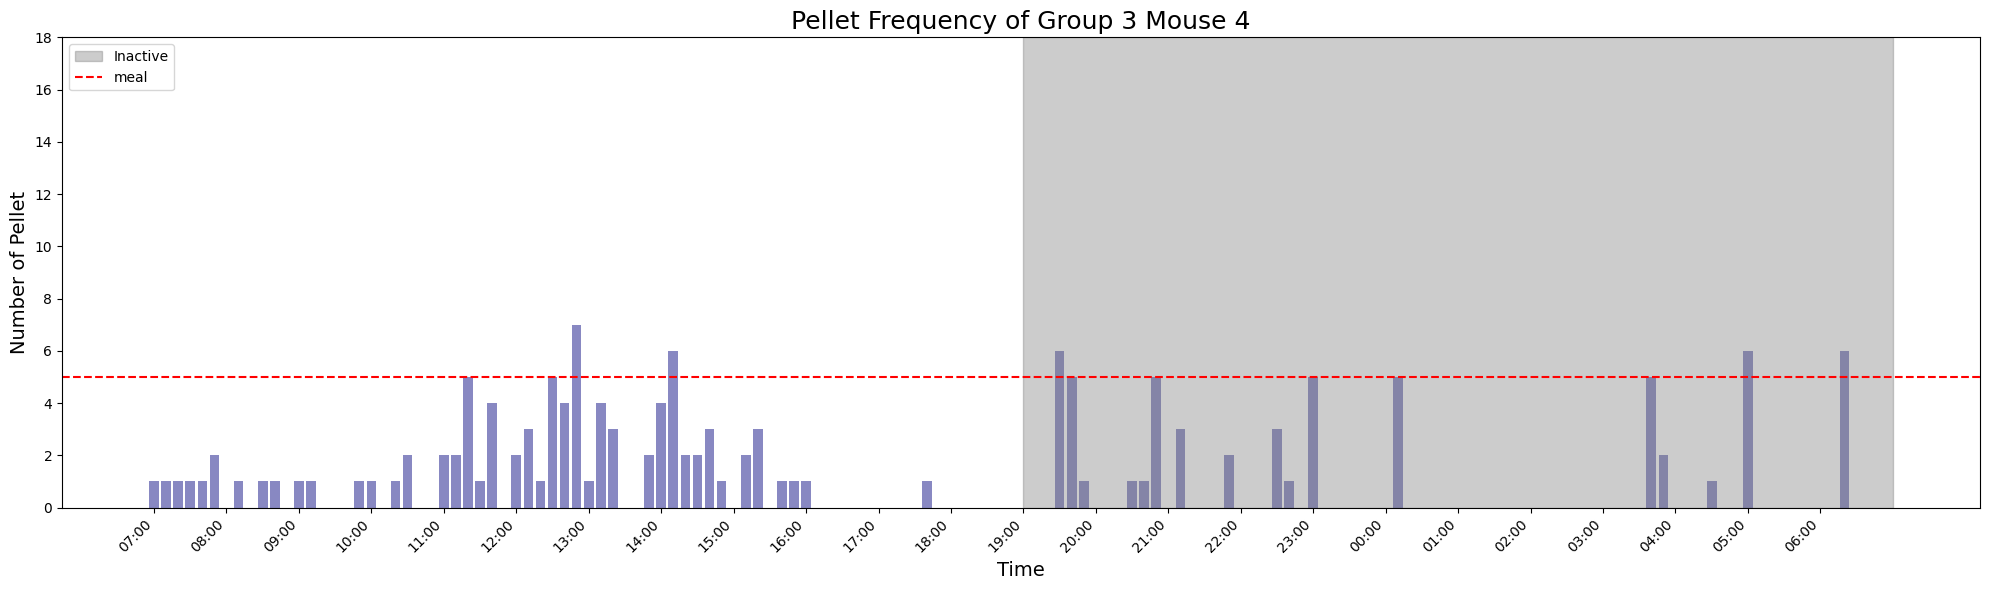

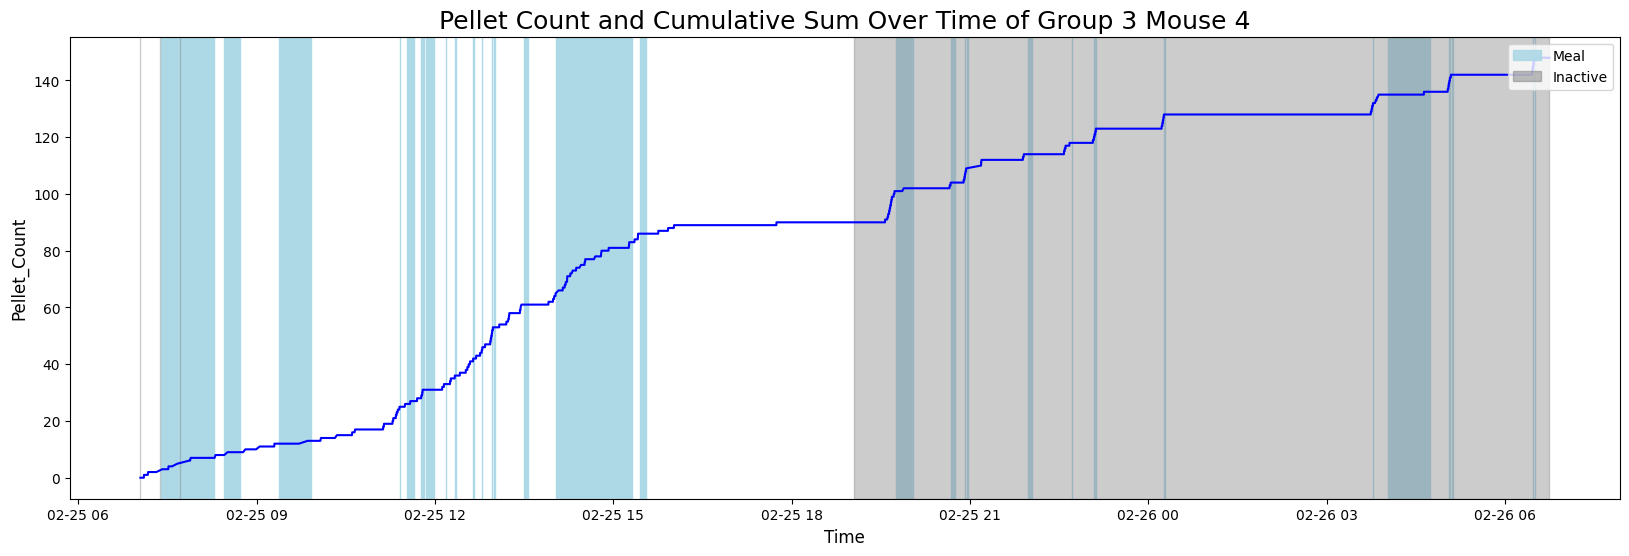

In [2]:
female_avg_pellet = [] # pellet per hour
female_dark_meals = [] # percentage of meals in inactive/dark phase
female_fir_meal = []
female_fir_good_meal = []
flip_female_meal_count = []

for sheet in fr1_female_sheets:
    data = read_excel_by_sheet(sheet=sheet, parent=fr1_female_path)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(sheet)
    meal,_ = ml.find_meals_paper(data, time_threshold=60, pellet_threshold=2)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    meal_with_acc, first_meal_time = ml.find_first_good_meal(data, 60, 2, 'lstm')
    meal_1_good = (first_meal_time - data['Time'][0]).total_seconds() / 3600
    female_fir_meal.append(meal_1)
    female_fir_good_meal.append(meal_1_good)
    flip_female_meal_count.append(round(len(meal) / ml.experiment_duration(data), 2))
    female_avg_pellet.append(ml.average_pellet(group))
    female_dark_meals.append(ml.active_meal(meal))

    ml.graph_pellet_frequency(group, bhv, num, export_path=os.path.join(export_root, f'female_{sheet}_pellet_frequency.svg'))
    ml.graphing_cum_count(data, meal, bhv, num, flip=True, export_path=os.path.join(export_root, f'female_{sheet}_cumulative_sum.svg'))

Female Size: 17
Female Average: 209.30117647058822
Female Standard Error: 8.301614045854832


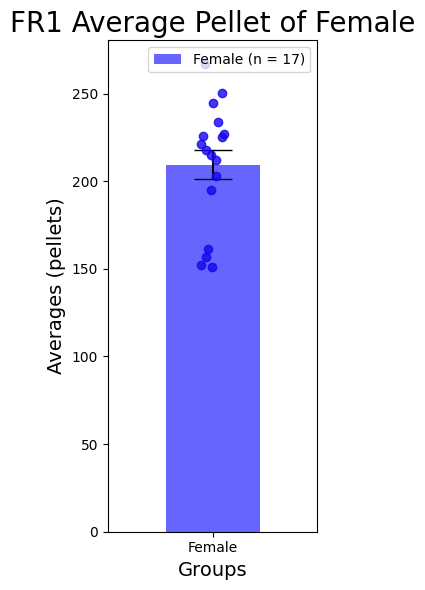

In [3]:
graph_single_stats(female_avg_pellet, stats_name='FR1 Average Pellet', unit='pellets', group_name='Female',
                    bar_width=0.45, export_path=os.path.join(export_root, '..', 'WT_FR1_pellet counts.svg'))

#### Time needed to start the first meal

Female Size: 17
Female Average: 1.4801764705718956
Female Standard Error: 0.2124493263582586


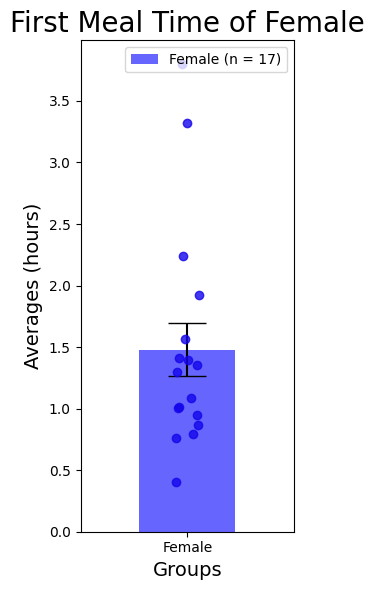

In [4]:
graph_single_stats(female_fir_meal, stats_name='First Meal Time', unit='hours', group_name='Female',
                  bar_width=0.45, export_path=os.path.join(export_root, '..', 'WT_1stMealTime.svg'))

Female Size: 17
Female Average: 2.682281045751634
Female Standard Error: 0.2774962493178288


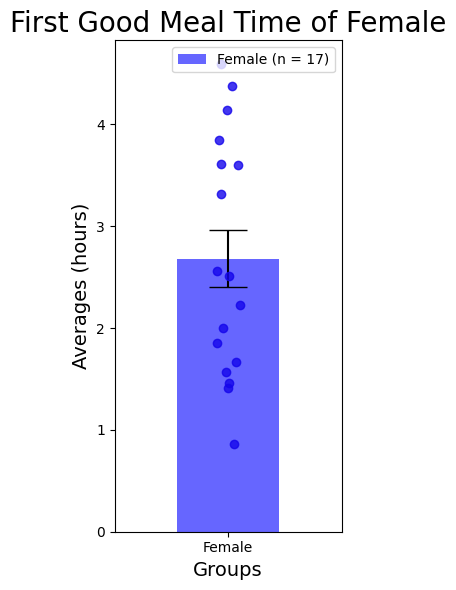

In [5]:
graph_single_stats(female_fir_good_meal, stats_name='First Good Meal Time', unit='hours', group_name='Female',
                  bar_width=0.45, export_path=os.path.join(export_root, '..', 'WT_1stGoodMealTime.svg'))